In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("NSDC - World Energy Consumption.csv")
df.head()

Country   1965   1966   1967   1968   1969   1970   1971  \
0                  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1               Canada   5.00   5.32   5.57   5.92   6.28   6.73   6.94   
2               Mexico   1.06   1.12   1.14   1.24   1.36   1.45   1.53   
3                   US  51.98  54.89  56.80  60.19  63.30  65.54  66.92   
4  Total North America  58.04  61.33  63.51  67.36  70.95  73.72  75.39   

    1972   1973  ...    2014    2015    2016    2017    2018    2019    2020  \
0    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1   7.47   8.11  ...   14.43   14.47   14.34   14.54   14.72   14.64   13.76   
2   1.69   1.82  ...    8.03    7.94    8.11    8.26    8.15    8.07    7.35   
3  70.25  73.22  ...   93.59   92.69   92.62   92.97   96.37   95.68   88.64   
4  79.41  83.16  ...  116.04  115.10  115.07  115.76  119.25  118.40  109.75   

     2021    2022    2023  
0     NaN     NaN     NaN  
1   13.92   14.30   13.95  
2    7.83    8.18    8.45  
3   93.44   95.42   94.28  
4  115.20  117.90  116.68  

[5 rows x 60 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  103 non-null    object
 1   1965     103 non-null    object
 2   1966     103 non-null    object
 3   1967     103 non-null    object
 4   1968     103 non-null    object
 5   1969     103 non-null    object
 6   1970     103 non-null    object
 7   1971     103 non-null    object
 8   1972     103 non-null    object
 9   1973     103 non-null    object
 10  1974     103 non-null    object
 11  1975     103 non-null    object
 12  1976     103 non-null    object
 13  1977     103 non-null    object
 14  1978     103 non-null    object
 15  1979     103 non-null    object
 16  1980     103 non-null    object
 17  1981     103 non-null    object
 18  1982     103 non-null    object
 19  1983     103 non-null    object
 20  1984     103 non-null    object
 21  1985     103 non-null    object
 22  19

In [4]:
df.isnull().sum()

Country    8
1965       8
1966       8
1967       8
1968       8
1969       8
1970       8
1971       8
1972       8
1973       8
1974       8
1975       8
1976       8
1977       8
1978       8
1979       8
1980       8
1981       8
1982       8
1983       8
1984       8
1985       8
1986       8
1987       8
1988       8
1989       8
1990       8
1991       8
1992       8
1993       8
1994       8
1995       8
1996       8
1997       8
1998       8
1999       8
2000       8
2001       8
2002       8
2003       8
2004       8
2005       8
2006       8
2007       8
2008       8
2009       8
2010       8
2011       8
2012       8
2013       8
2014       8
2015       8
2016       8
2017       8
2018       8
2019       8
2020       8
2021       8
2022       8
2023       8
dtype: int64

In [5]:
df.dropna(axis = 0, inplace=True)

In [6]:
df.isna().sum()

Country    0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

In [7]:
df.head()

Country   1965   1966   1967   1968   1969   1970   1971  \
1               Canada   5.00   5.32   5.57   5.92   6.28   6.73   6.94   
2               Mexico   1.06   1.12   1.14   1.24   1.36   1.45   1.53   
3                   US  51.98  54.89  56.80  60.19  63.30  65.54  66.92   
4  Total North America  58.04  61.33  63.51  67.36  70.95  73.72  75.39   
6            Argentina   1.18   1.22   1.26   1.30   1.34   1.27   1.35   

    1972   1973  ...    2014    2015    2016    2017    2018    2019    2020  \
1   7.47   8.11  ...   14.43   14.47   14.34   14.54   14.72   14.64   13.76   
2   1.69   1.82  ...    8.03    7.94    8.11    8.26    8.15    8.07    7.35   
3  70.25  73.22  ...   93.59   92.69   92.62   92.97   96.37   95.68   88.64   
4  79.41  83.16  ...  116.04  115.10  115.07  115.76  119.25  118.40  109.75   
6   1.37   1.43  ...    3.53    3.59    3.57    3.57    3.54    3.34    3.13   

     2021    2022    2023  
1   13.92   14.30   13.95  
2    7.83    8.18    8.45  
3   93.44   95.42   94.28  
4  115.20  117.90  116.68  
6    3.45    3.71    3.67  

[5 rows x 60 columns]

In [8]:
df.columns

Index(['Country', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [9]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df

Country    1965    1966    1967    1968  \
1                               Canada    5.00    5.32    5.57    5.92   
2                               Mexico    1.06    1.12    1.14    1.24   
3                                   US   51.98   54.89   56.80   60.19   
4                  Total North America   58.04   61.33   63.51   67.36   
6                            Argentina    1.18    1.22    1.26    1.30   
7                               Brazil    0.99    1.08    1.11    1.27   
8                                Chile    0.26    0.28    0.29    0.28   
9                             Colombia    0.35    0.40    0.42    0.43   
10                             Ecuador    0.03    0.03    0.04    0.04   
11                                Peru    0.20    0.24    0.25    0.25   
12                   Trinidad & Tobago    0.12    0.13    0.14    0.14   
13                           Venezuela    0.69    0.70    0.73    0.79   
14                     Central America    0.16    0.16    0.17    0.18   
15                     Other Caribbean    0.79    0.82    0.85    0.87   
16                 Other South America    0.15    0.16    0.16    0.17   
17            Total S. & Cent. America    4.92    5.21    5.41    5.73   
19                             Austria    0.68    0.71    0.72    0.77   
20                             Belgium    1.49    1.43    1.50    1.68   
21                            Bulgaria    0.43    0.46    0.54    0.60   
22                             Croatia       -       -       -       -   
23                              Cyprus    0.02    0.02    0.02    0.02   
24                      Czech Republic    1.69    1.70    1.67    1.75   
25                             Denmark    0.60    0.68    0.68    0.72   
26                             Estonia       -       -       -       -   
27                             Finland    0.42    0.47    0.50    0.54   
28                              France    4.85    4.96    5.26    5.54   
29                             Germany   10.69   10.72   10.69   11.41   
30                              Greece    0.28    0.31    0.34    0.36   
31                             Hungary    0.67    0.67    0.64    0.67   
32                             Iceland    0.03    0.03    0.03    0.03   
33                             Ireland    0.24    0.27    0.30    0.34   
34                               Italy    3.34    3.63    3.93    4.25   
35                              Latvia       -       -       -       -   
36                           Lithuania       -       -       -       -   
37                          Luxembourg    0.15    0.14    0.14    0.15   
38                         Netherlands    1.49    1.60    1.69    1.89   
39                     North Macedonia       -       -       -       -   
40                              Norway    0.78    0.79    0.85    0.95   
41                              Poland    2.79    2.85    2.93    3.15   
42                            Portugal    0.18    0.20    0.21    0.21   
43                             Romania    1.00    1.07    1.19    1.27   
44                            Slovakia    0.38    0.40    0.40    0.44   
45                            Slovenia       -       -       -       -   
46                               Spain    1.21    1.37    1.48    1.56   
47                              Sweden    1.41    1.51    1.55    1.65   
48                         Switzerland    0.66    0.71    0.75    0.79   
49                              Turkey    0.33    0.38    0.39    0.46   
50                             Ukraine       -       -       -       -   
51                      United Kingdom    8.34    8.38    8.38    8.68   
52                        Other Europe    0.67    0.70    0.71    0.78   
53                        Total Europe   44.82   46.17   47.52   50.67   
55                          Azerbaijan       -       -       -       -   
56                             Belarus       -       -       -       -   
57                          Kazakhs

In [10]:
for col in df[df.columns[1:]]:
    df[col] = df[col].replace('-', '')
    df[col] = df[col].replace('^', '')

In [11]:
for col in df[df.columns[1:]]:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  103 non-null    object 
 1   1965     85 non-null     float64
 2   1966     86 non-null     float64
 3   1967     87 non-null     float64
 4   1968     87 non-null     float64
 5   1969     87 non-null     float64
 6   1970     87 non-null     float64
 7   1971     89 non-null     float64
 8   1972     89 non-null     float64
 9   1973     89 non-null     float64
 10  1974     89 non-null     float64
 11  1975     89 non-null     float64
 12  1976     89 non-null     float64
 13  1977     89 non-null     float64
 14  1978     89 non-null     float64
 15  1979     89 non-null     float64
 16  1980     89 non-null     float64
 17  1981     89 non-null     float64
 18  1982     89 non-null     float64
 19  1983     89 non-null     float64
 20  1984     89 non-null     float64
 21  1985     99 non-null 

In [13]:
df.dropna(inplace=True)

In [14]:
df

Country    1965    1966    1967    1968  \
1                               Canada    5.00    5.32    5.57    5.92   
2                               Mexico    1.06    1.12    1.14    1.24   
3                                   US   51.98   54.89   56.80   60.19   
4                  Total North America   58.04   61.33   63.51   67.36   
6                            Argentina    1.18    1.22    1.26    1.30   
7                               Brazil    0.99    1.08    1.11    1.27   
8                                Chile    0.26    0.28    0.29    0.28   
9                             Colombia    0.35    0.40    0.42    0.43   
10                             Ecuador    0.03    0.03    0.04    0.04   
11                                Peru    0.20    0.24    0.25    0.25   
12                   Trinidad & Tobago    0.12    0.13    0.14    0.14   
13                           Venezuela    0.69    0.70    0.73    0.79   
14                     Central America    0.16    0.16    0.17    0.18   
15                     Other Caribbean    0.79    0.82    0.85    0.87   
16                 Other South America    0.15    0.16    0.16    0.17   
17            Total S. & Cent. America    4.92    5.21    5.41    5.73   
19                             Austria    0.68    0.71    0.72    0.77   
20                             Belgium    1.49    1.43    1.50    1.68   
21                            Bulgaria    0.43    0.46    0.54    0.60   
23                              Cyprus    0.02    0.02    0.02    0.02   
24                      Czech Republic    1.69    1.70    1.67    1.75   
25                             Denmark    0.60    0.68    0.68    0.72   
27                             Finland    0.42    0.47    0.50    0.54   
28                              France    4.85    4.96    5.26    5.54   
29                             Germany   10.69   10.72   10.69   11.41   
30                              Greece    0.28    0.31    0.34    0.36   
31                             Hungary    0.67    0.67    0.64    0.67   
32                             Iceland    0.03    0.03    0.03    0.03   
33                             Ireland    0.24    0.27    0.30    0.34   
34                               Italy    3.34    3.63    3.93    4.25   
37                          Luxembourg    0.15    0.14    0.14    0.15   
38                         Netherlands    1.49    1.60    1.69    1.89   
40                              Norway    0.78    0.79    0.85    0.95   
41                              Poland    2.79    2.85    2.93    3.15   
42                            Portugal    0.18    0.20    0.21    0.21   
43                             Romania    1.00    1.07    1.19    1.27   
44                            Slovakia    0.38    0.40    0.40    0.44   
46                               Spain    1.21    1.37    1.48    1.56   
47                              Sweden    1.41    1.51    1.55    1.65   
48                         Switzerland    0.66    0.71    0.75    0.79   
49                              Turkey    0.33    0.38    0.39    0.46   
51                      United Kingdom    8.34    8.38    8.38    8.68   
52                        Other Europe    0.67    0.70    0.71    0.78   
53                        Total Europe   44.82   46.17   47.52   50.67   
63                           Total CIS   24.90   26.48   27.83   28.87   
65                                Iran    0.35    0.38    0.42    0.46   
66                                Iraq    0.08    0.09    0.09    0.10   
67                              Israel    0.15    0.15    0.19    0.19   
68                              Kuwait    0.29    0.30    0.30    0.32   
70                               Qatar    0.01    0.01    0.01    0.02   
71                        Saudi Arabia    0.85    0.86    0.87    0.88   
73                   Other Middle East    0.22    0.23    0.23    0.25   
74                   Total Middle East    1.94    2.02    2.13    2.25   
76                             Alge

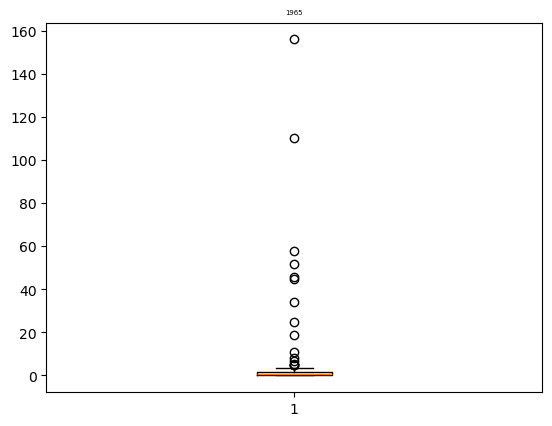

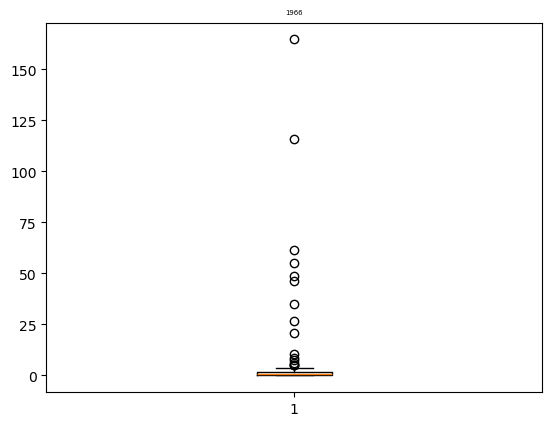

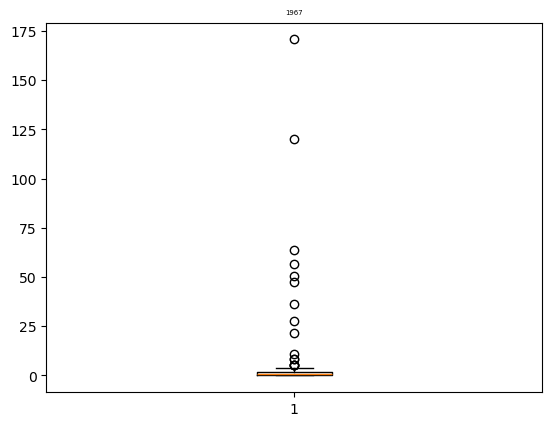

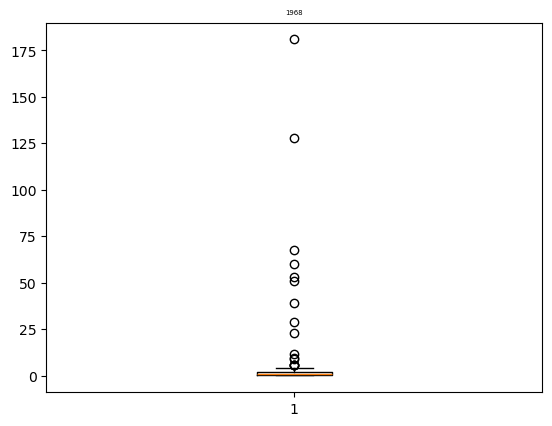

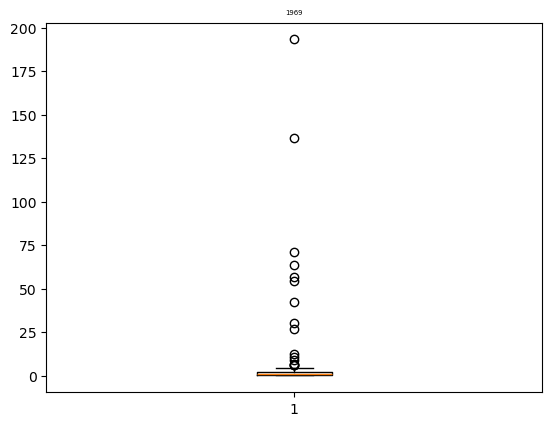

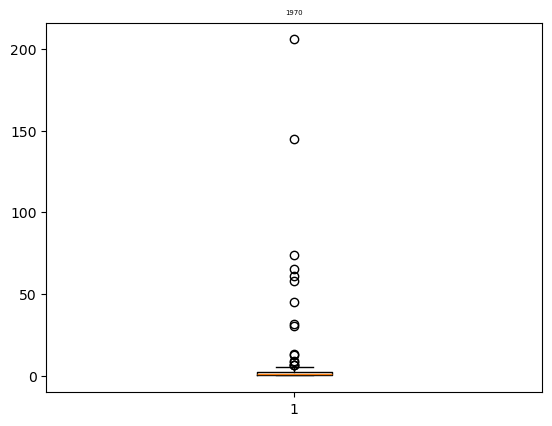

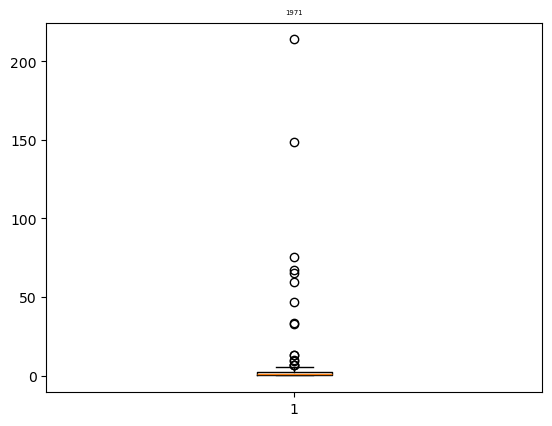

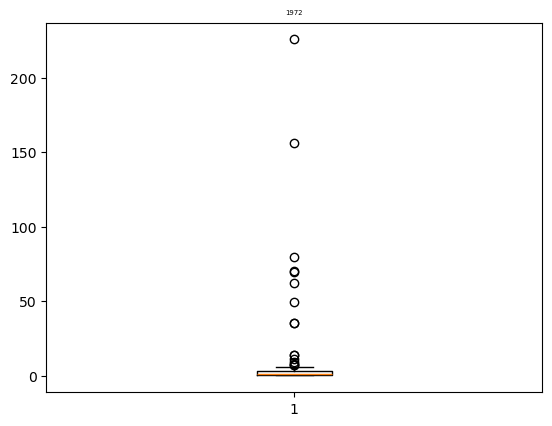

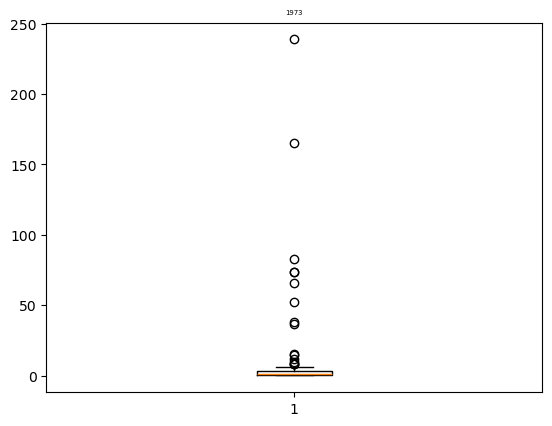

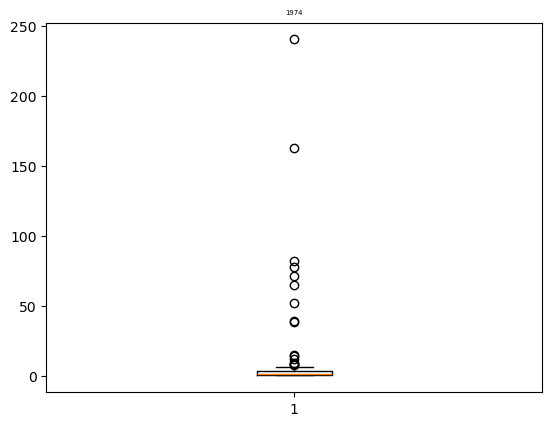

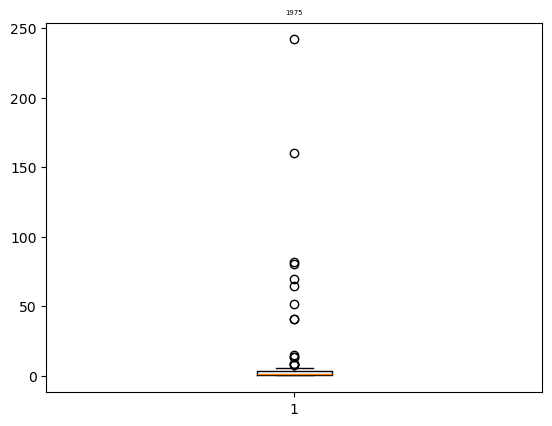

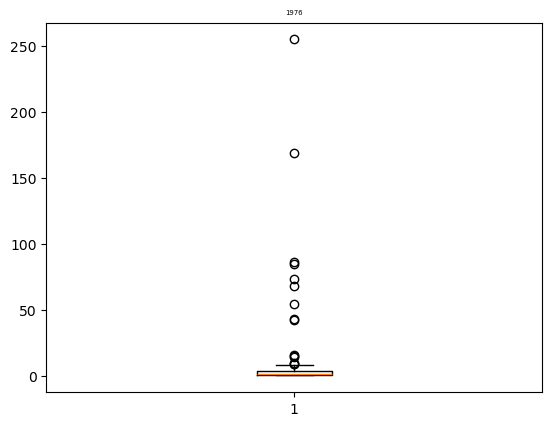

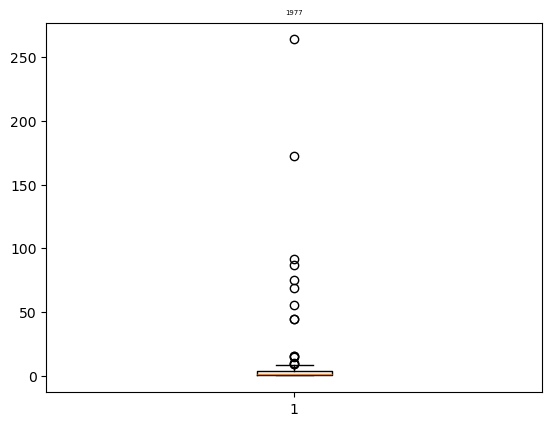

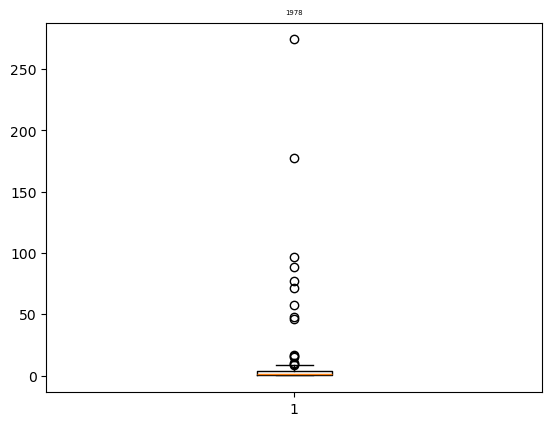

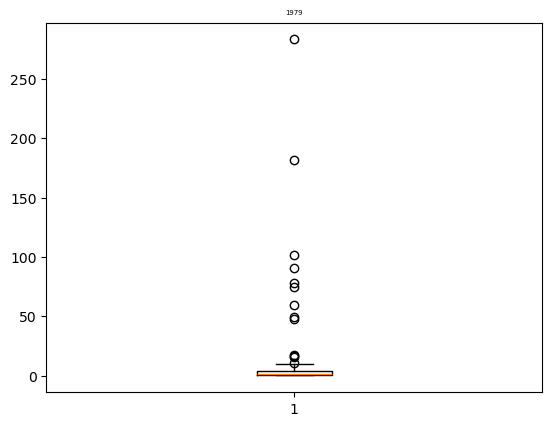

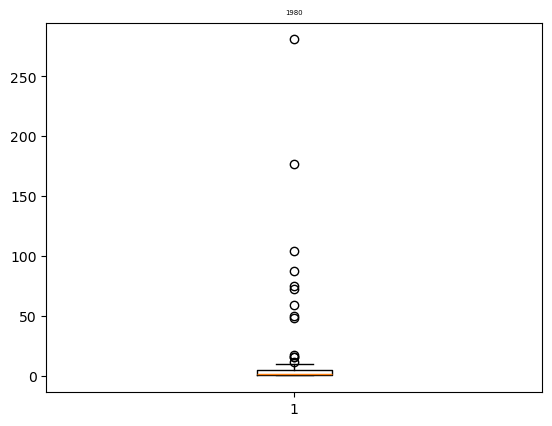

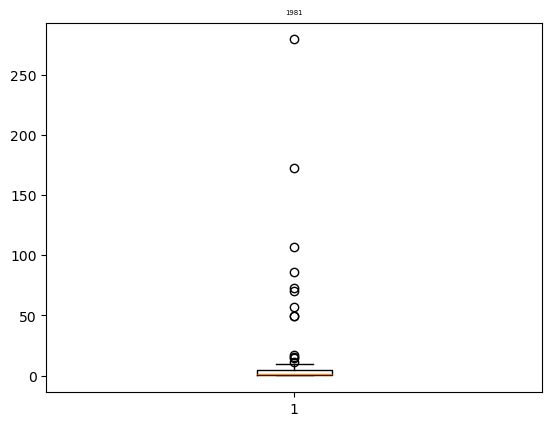

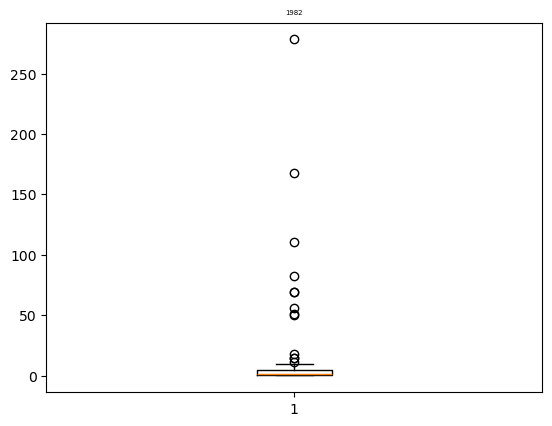

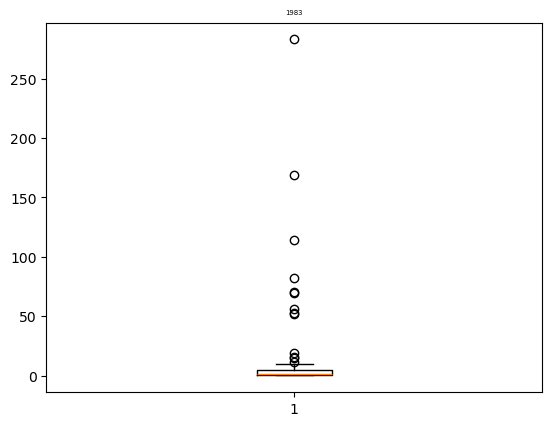

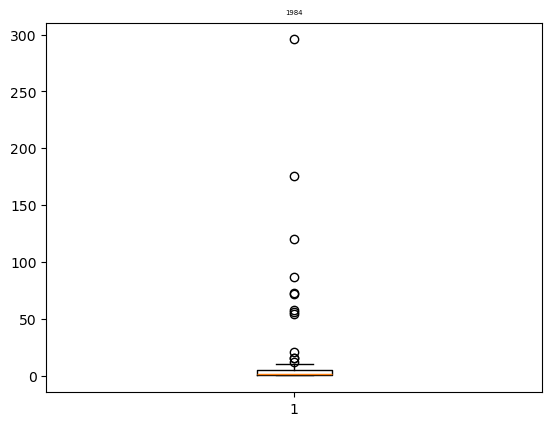

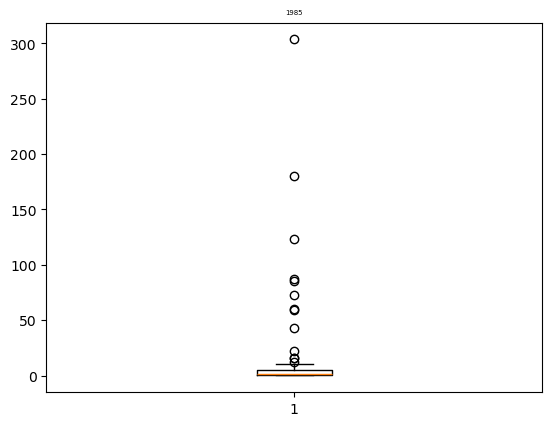

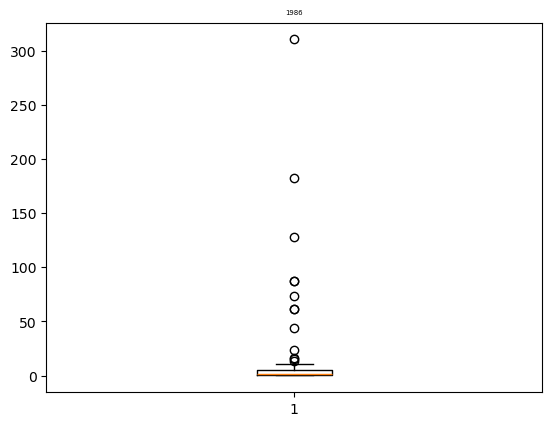

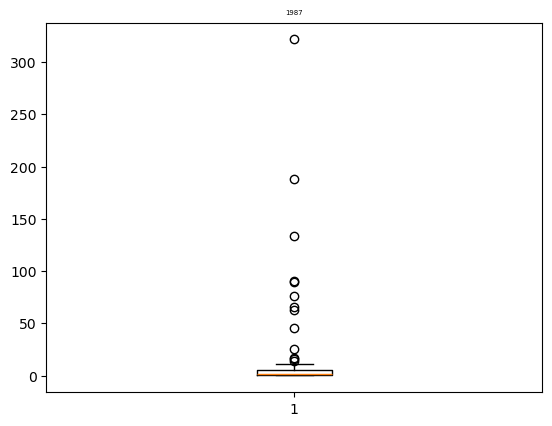

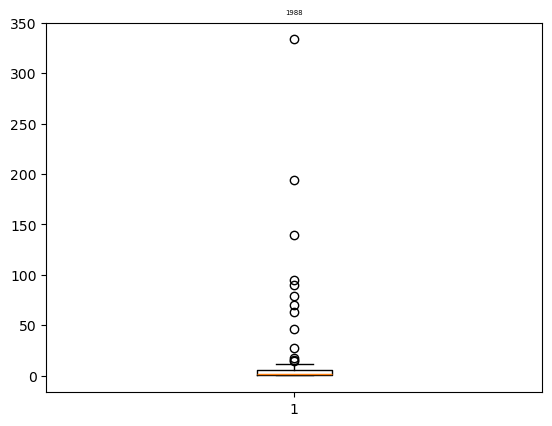

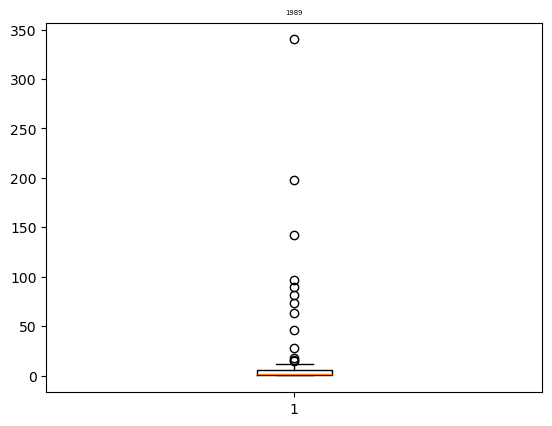

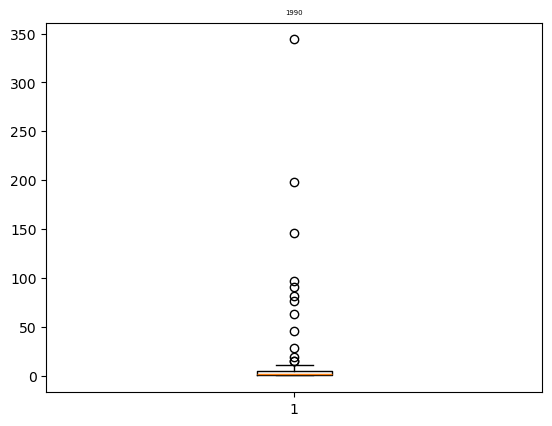

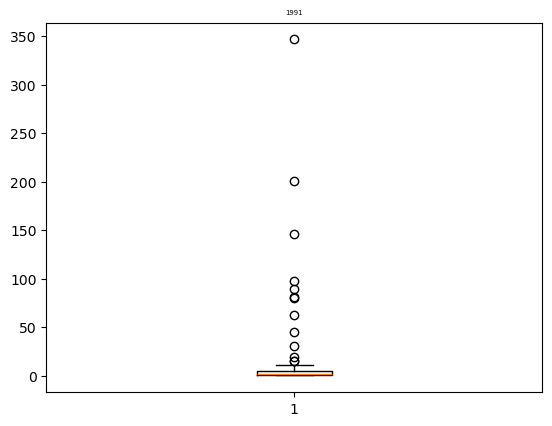

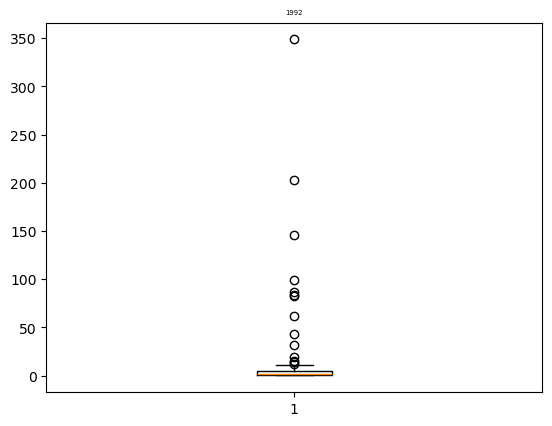

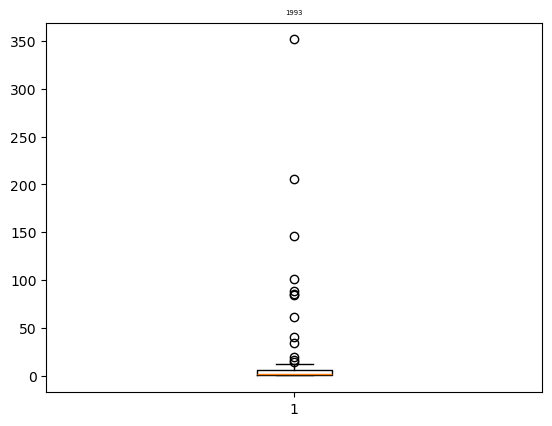

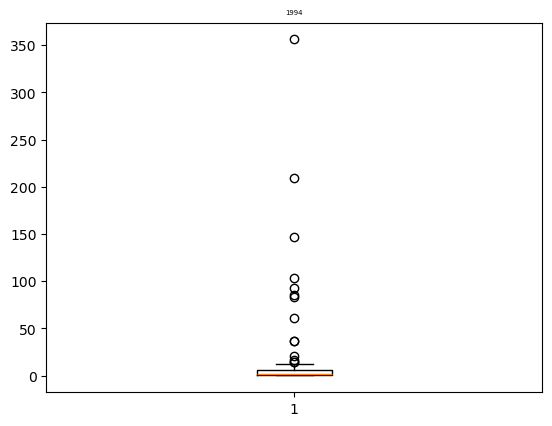

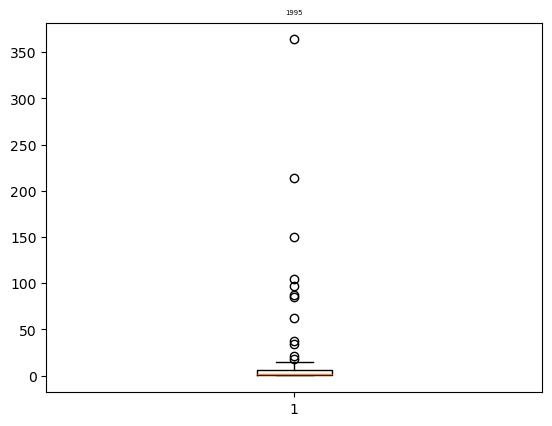

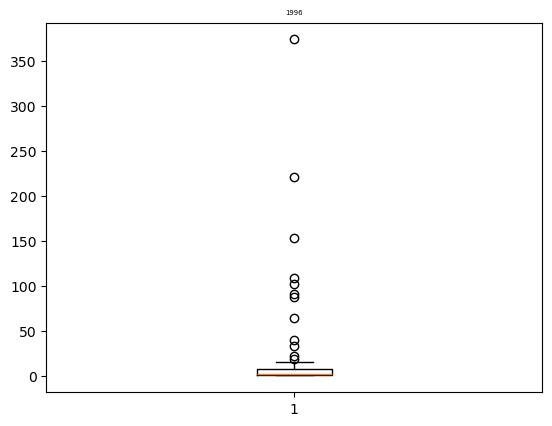

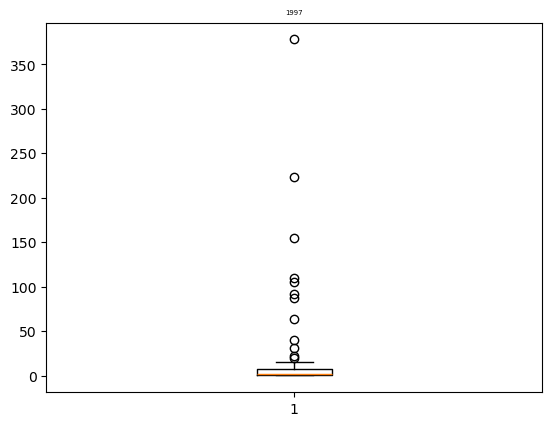

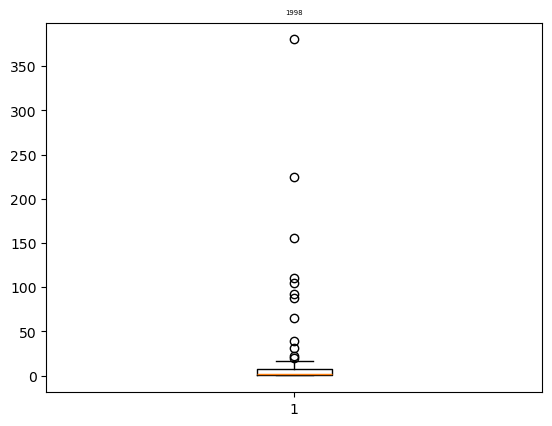

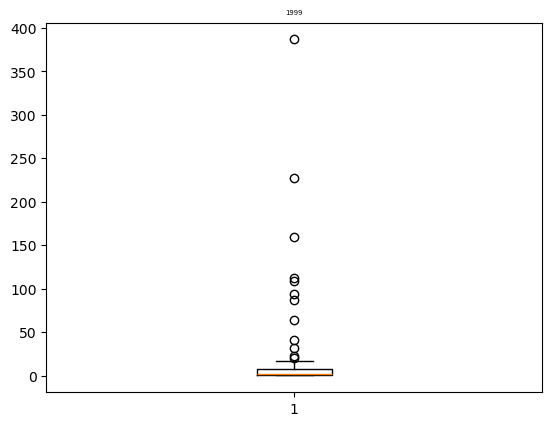

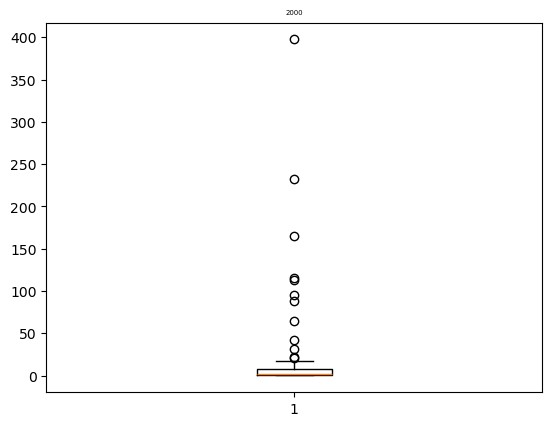

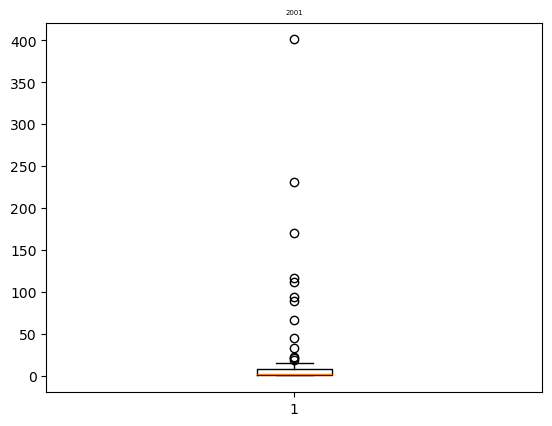

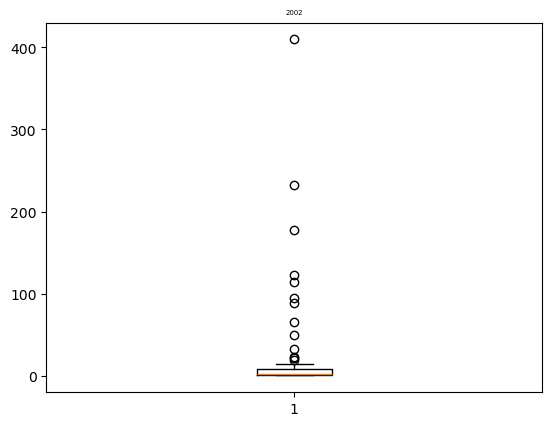

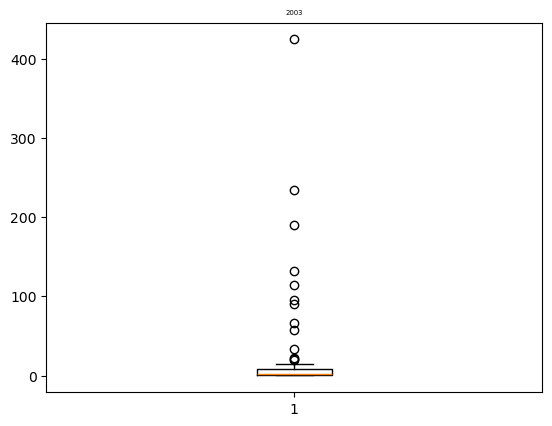

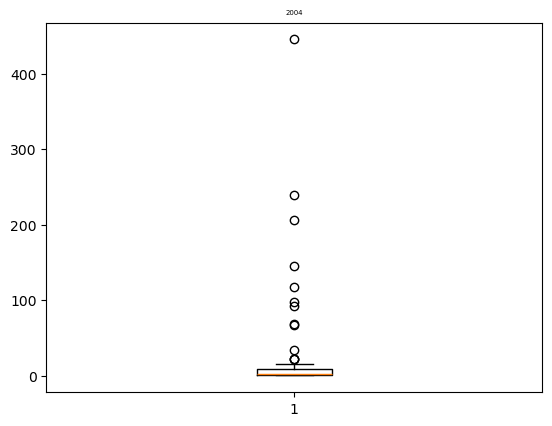

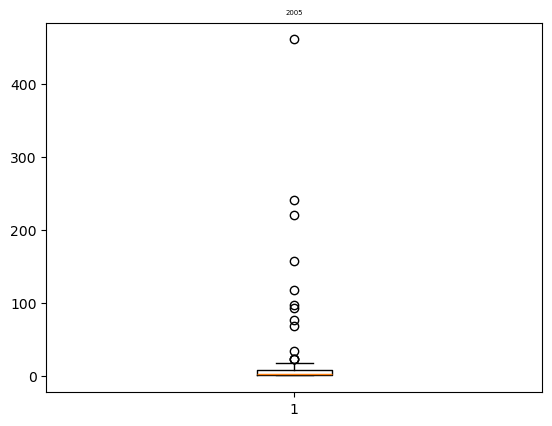

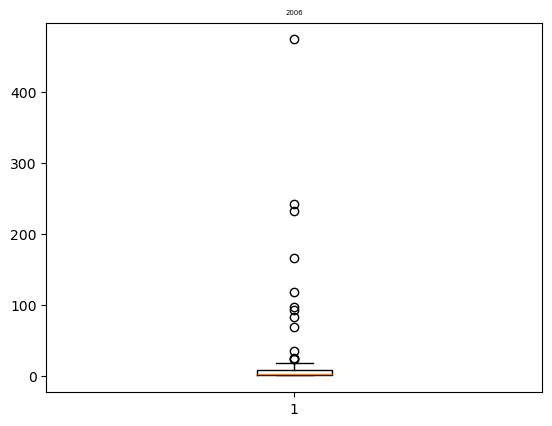

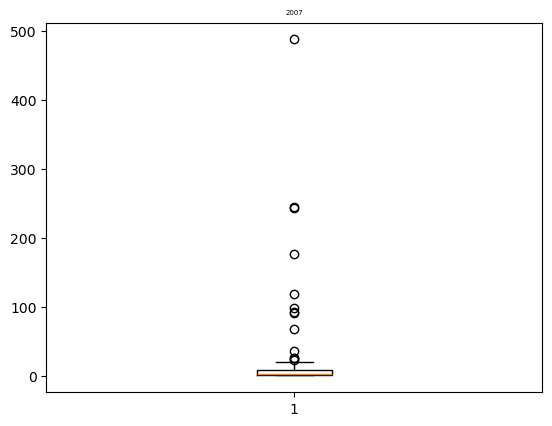

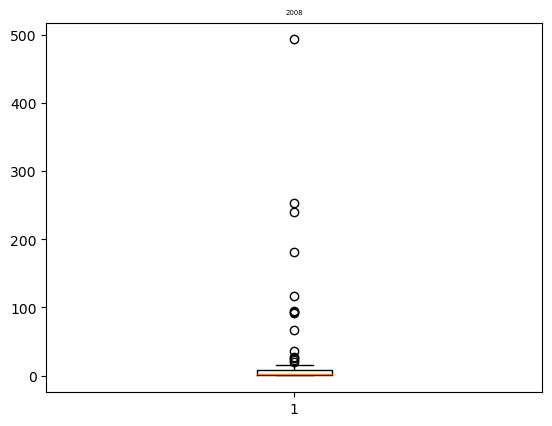

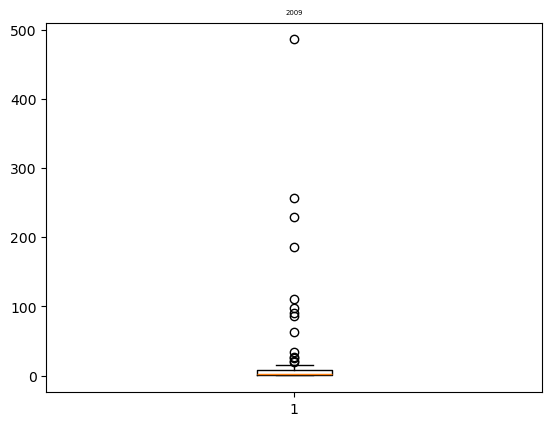

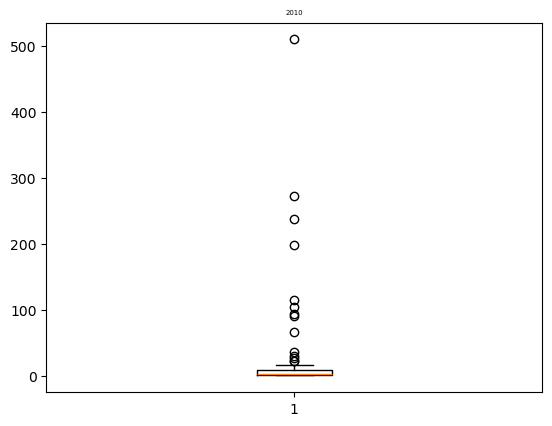

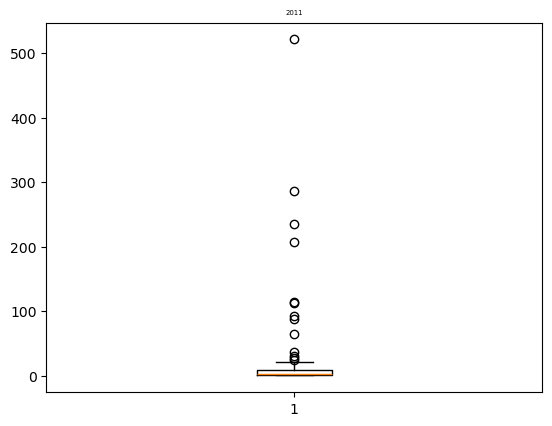

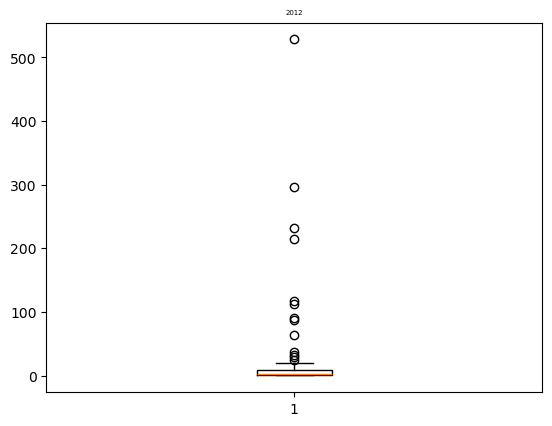

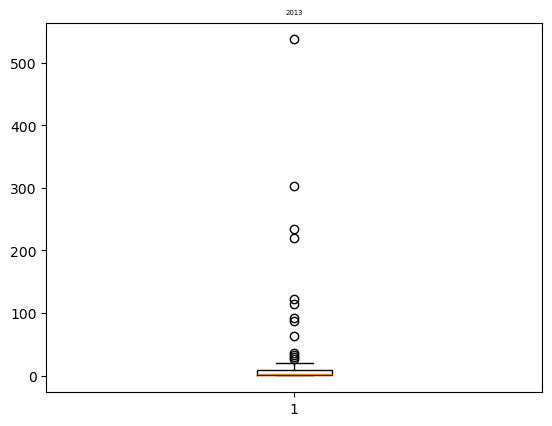

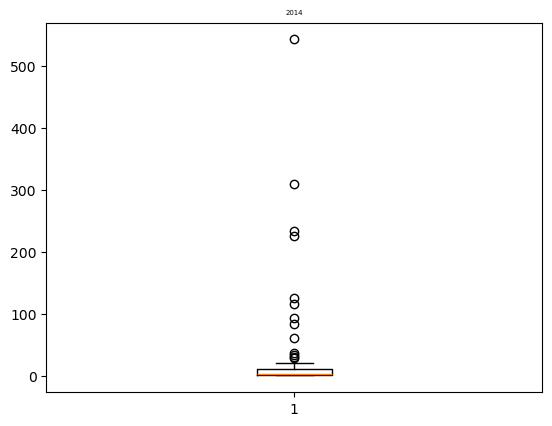

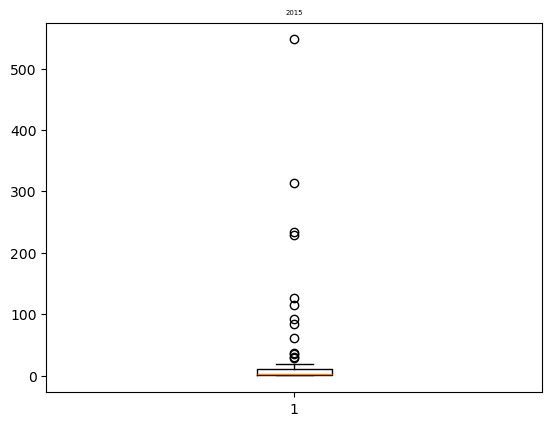

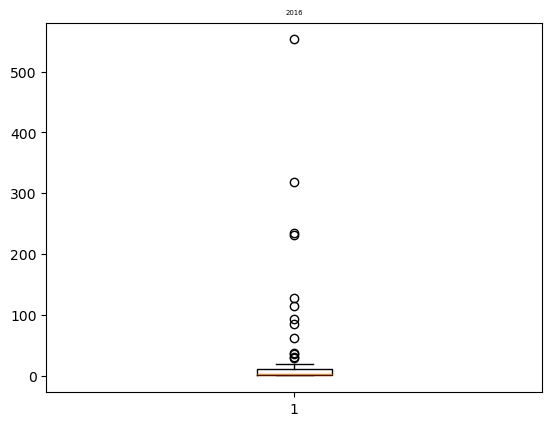

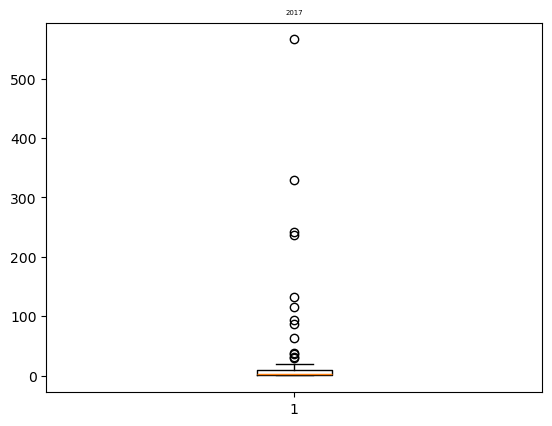

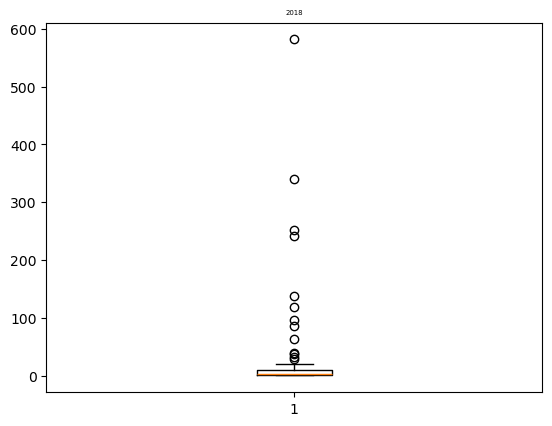

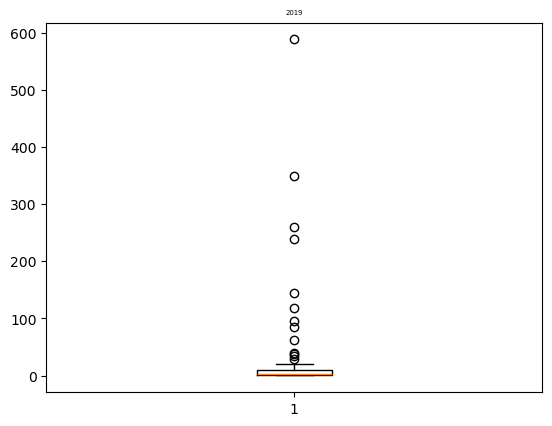

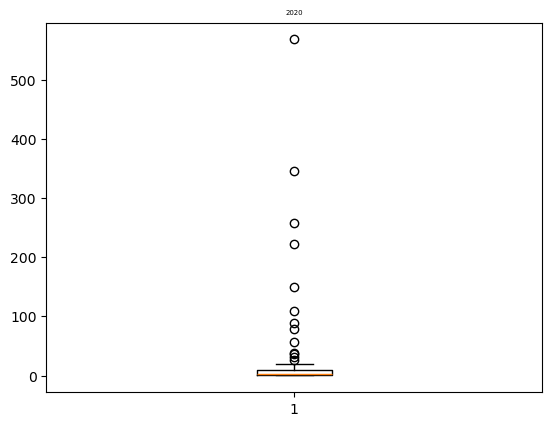

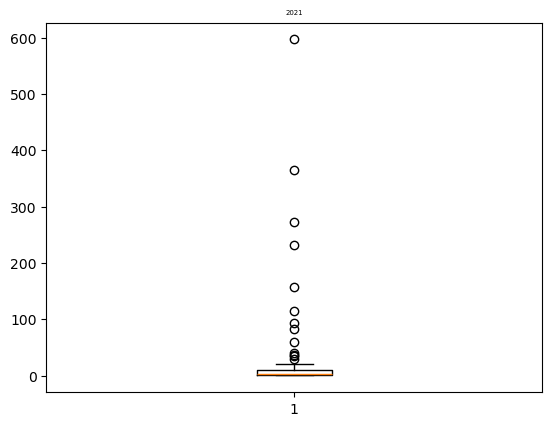

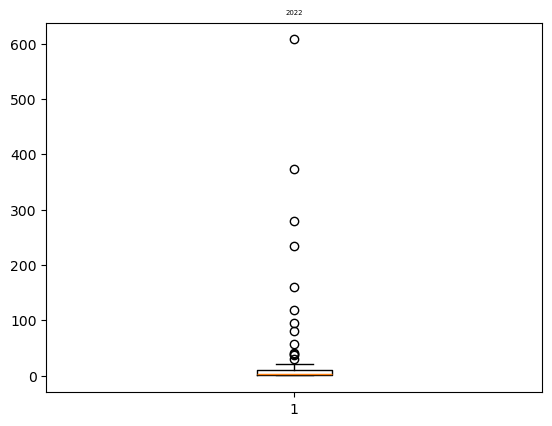

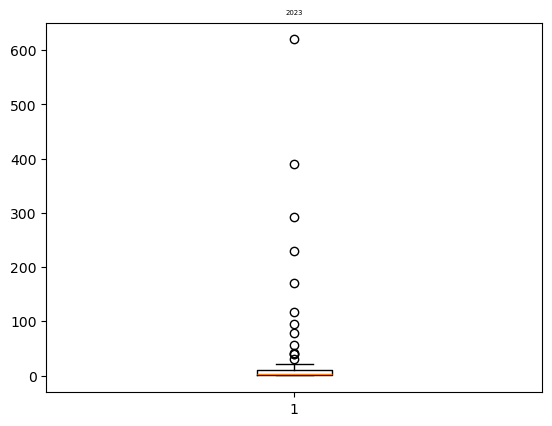

In [15]:
for col in df.columns[1:]:
    plt.boxplot(df[col])
    plt.title(df[col].name, fontsize=5)
    plt.show()

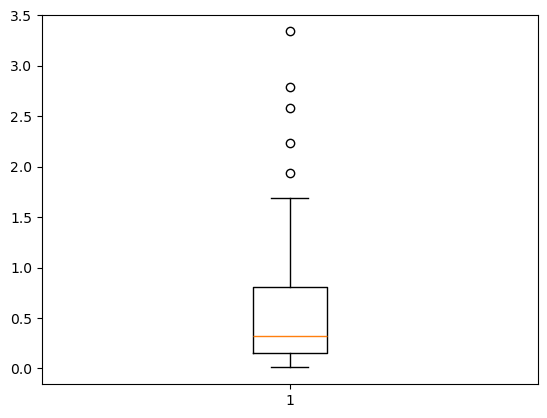

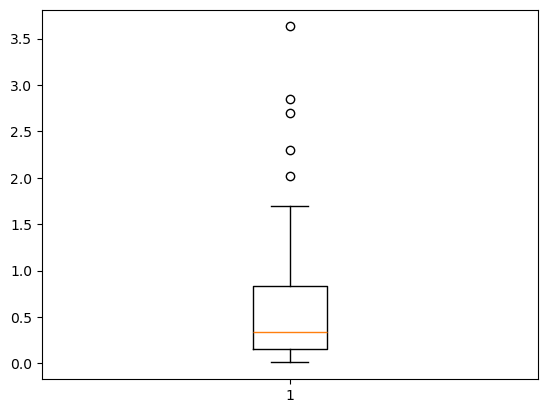

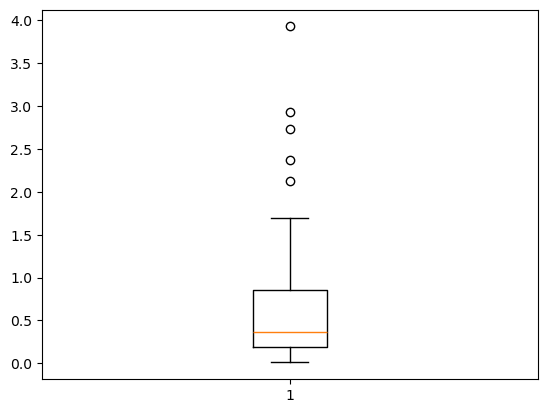

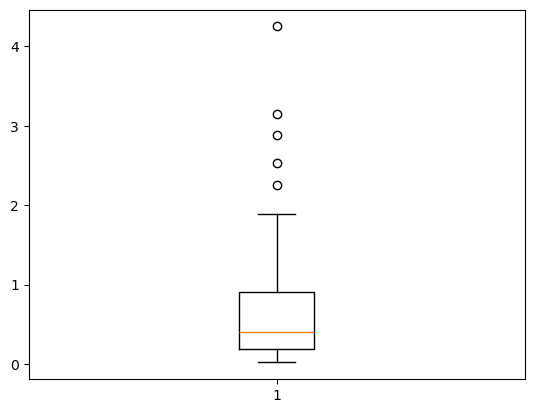

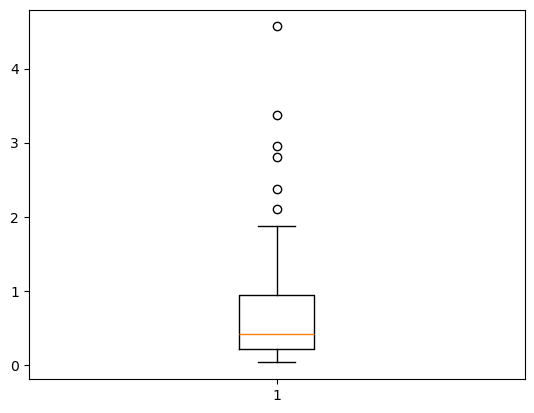

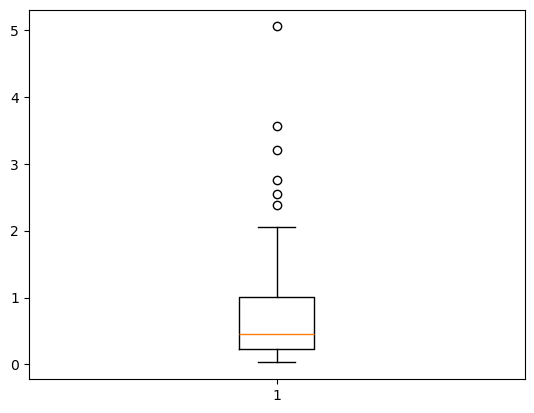

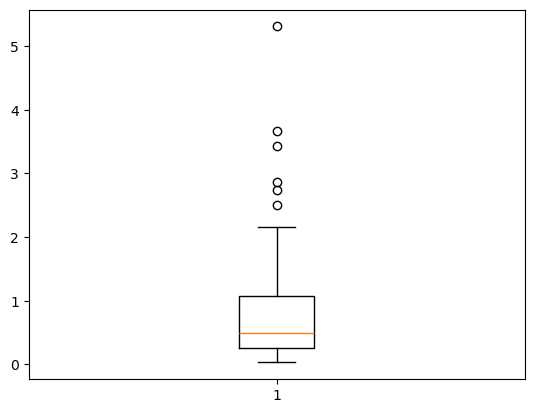

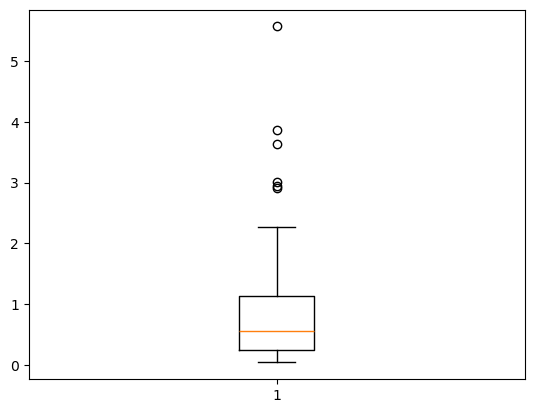

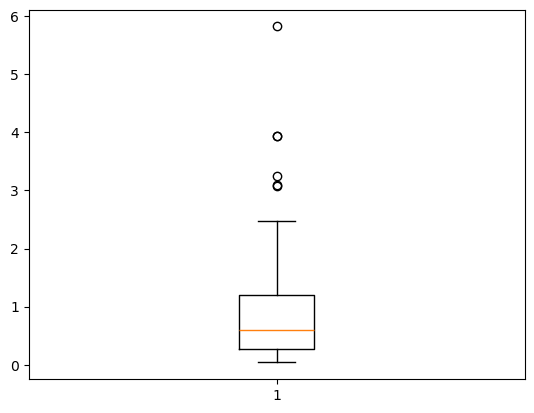

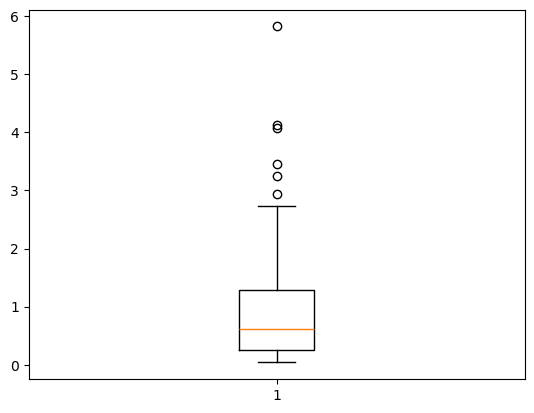

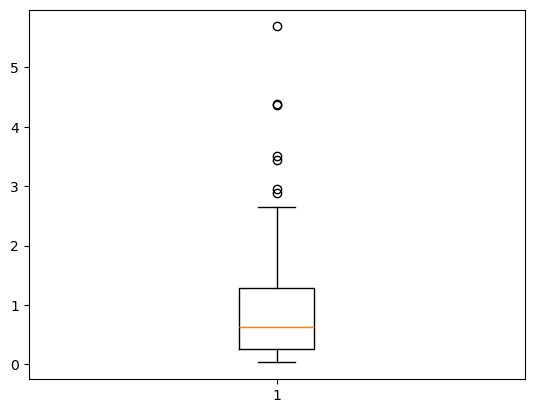

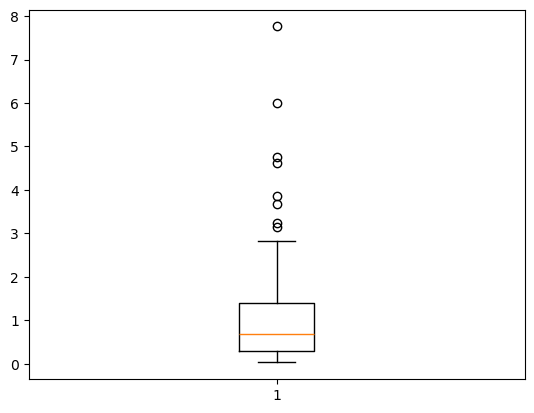

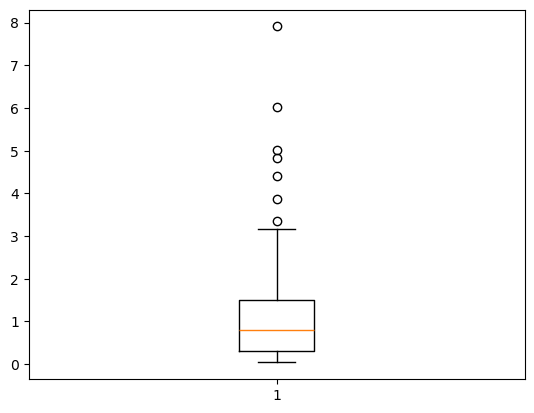

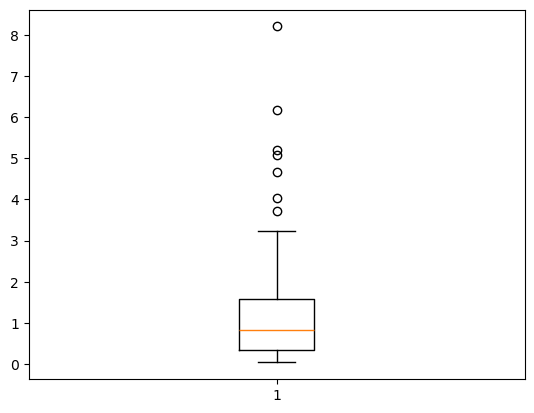

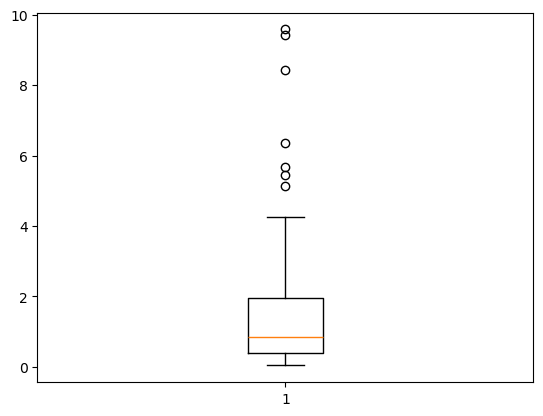

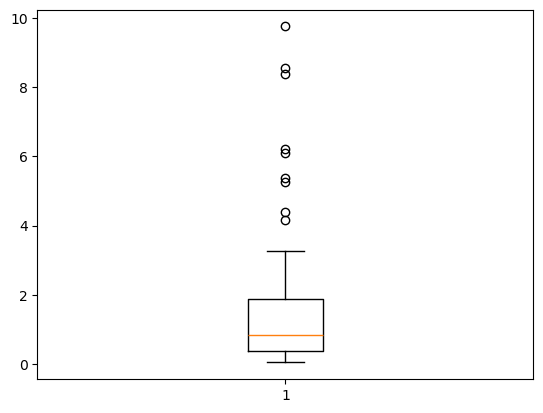

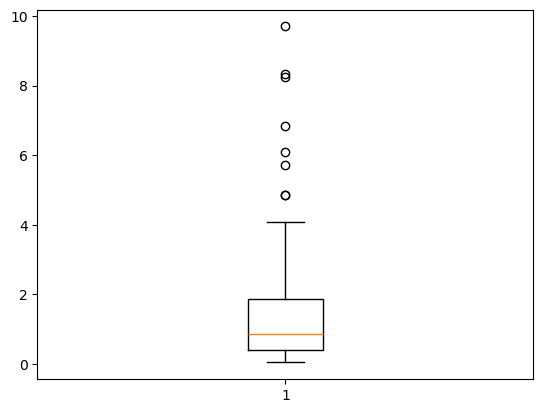

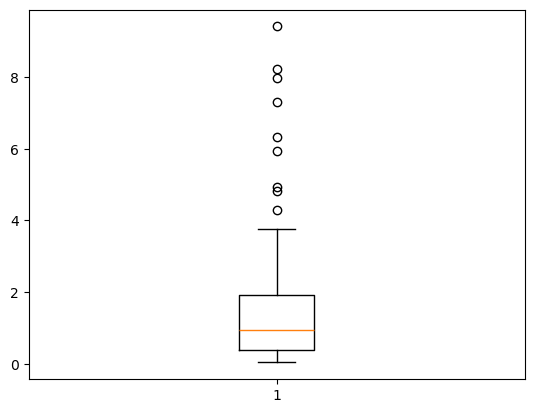

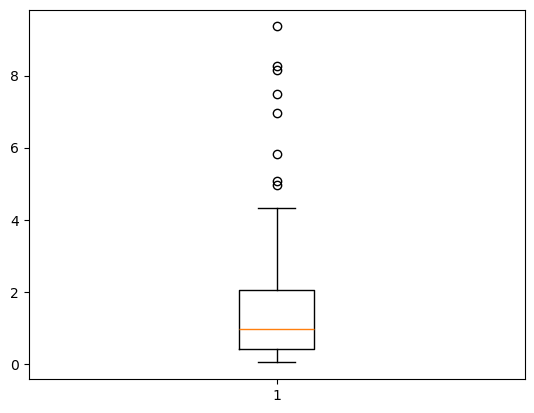

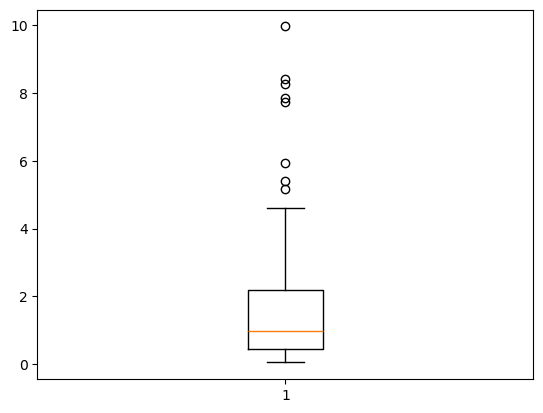

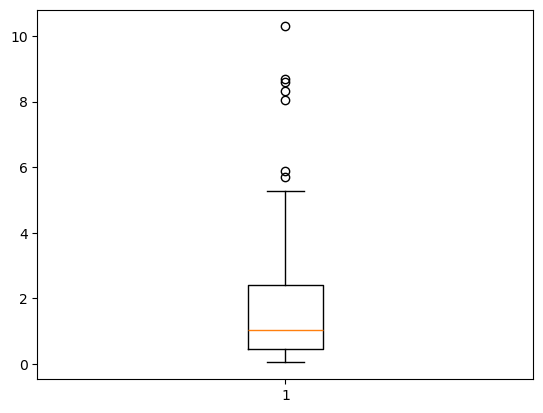

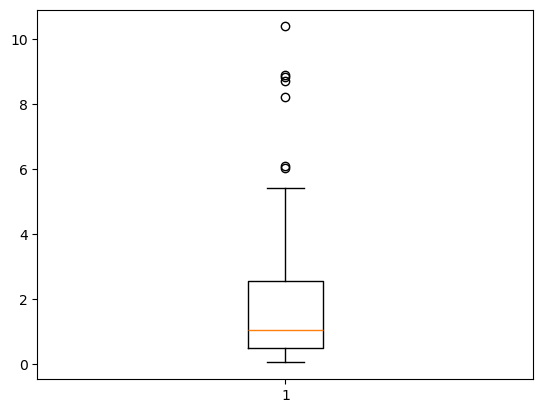

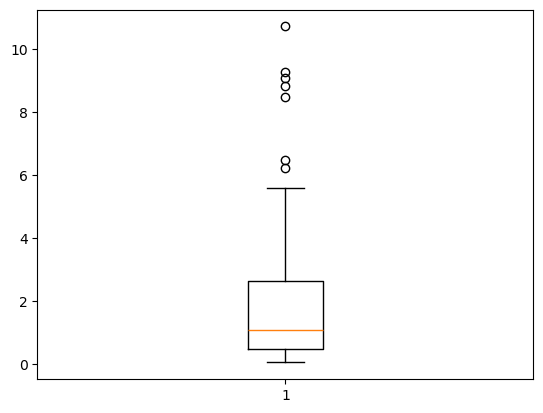

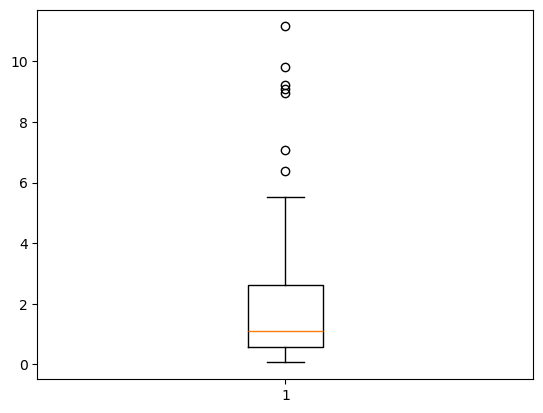

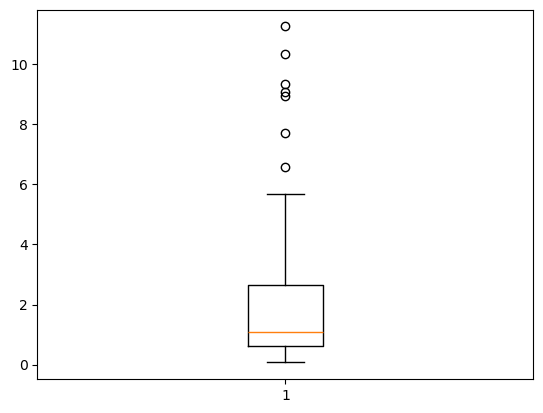

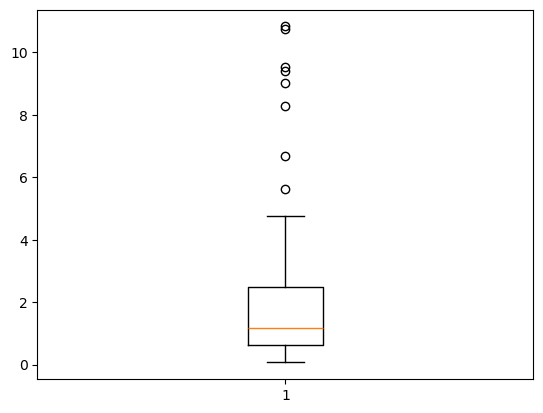

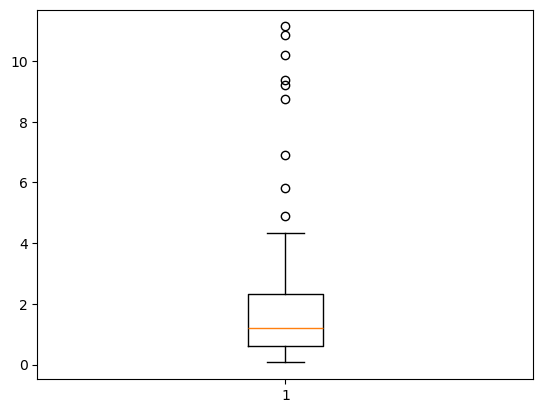

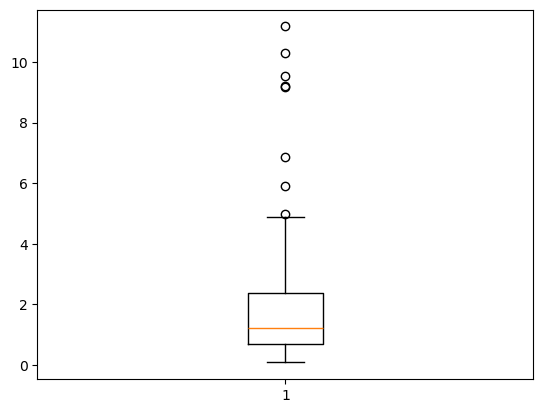

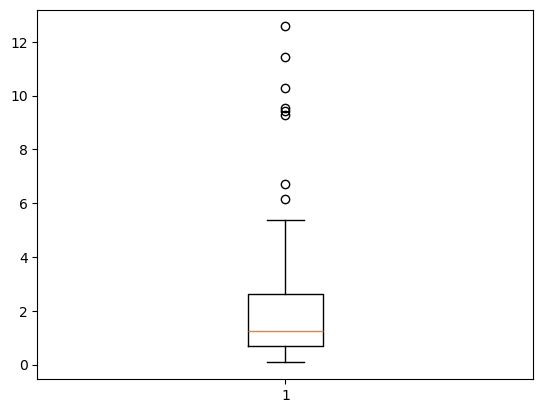

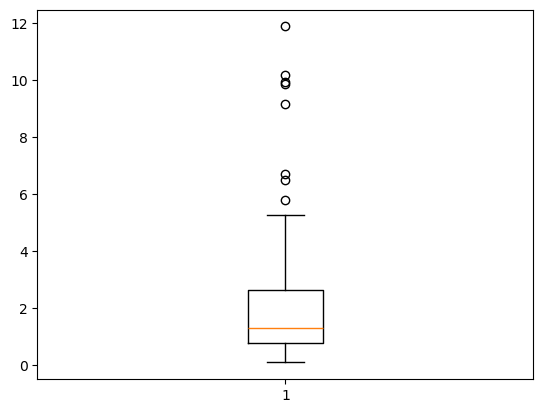

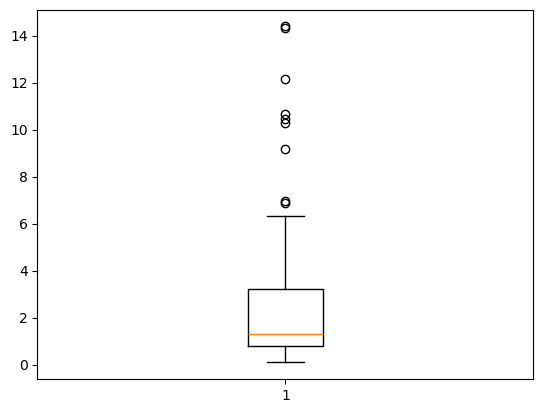

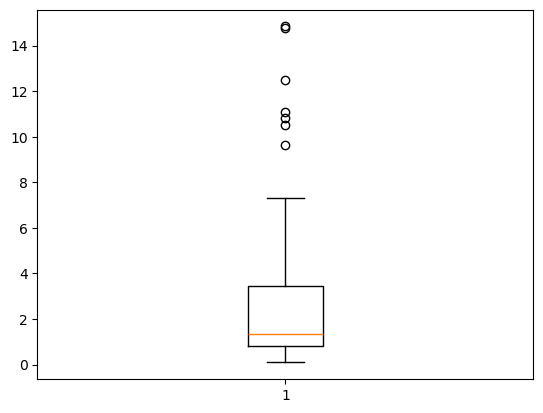

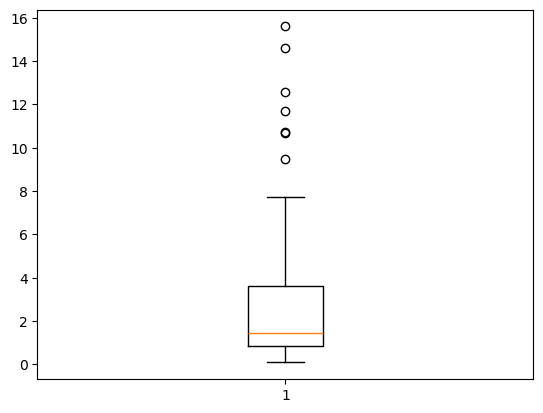

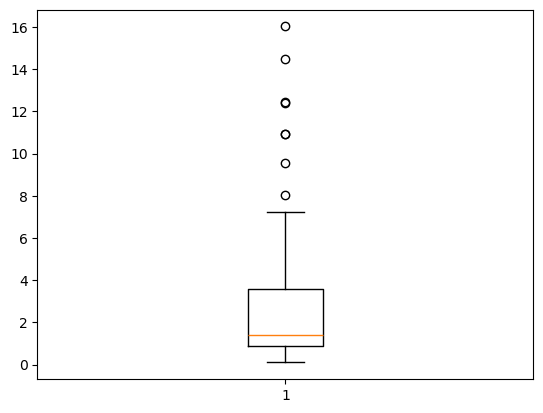

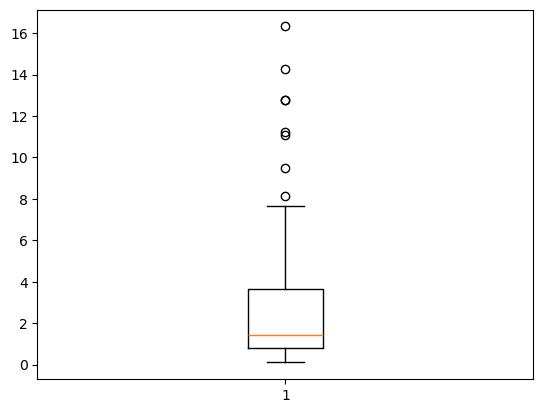

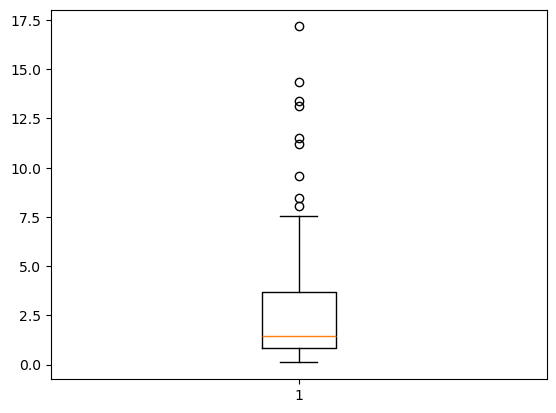

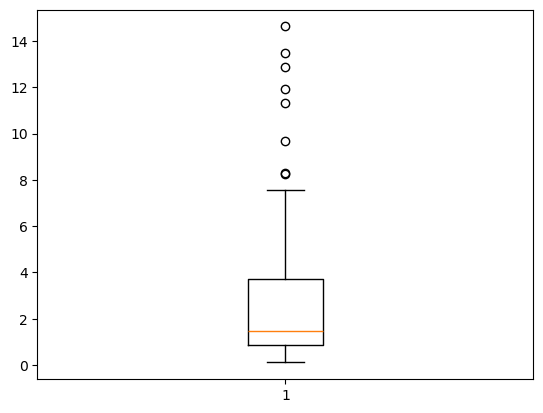

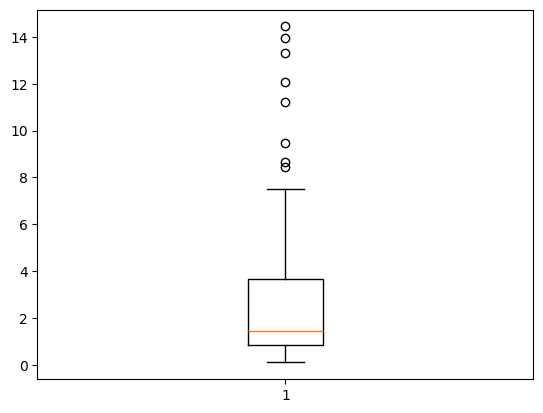

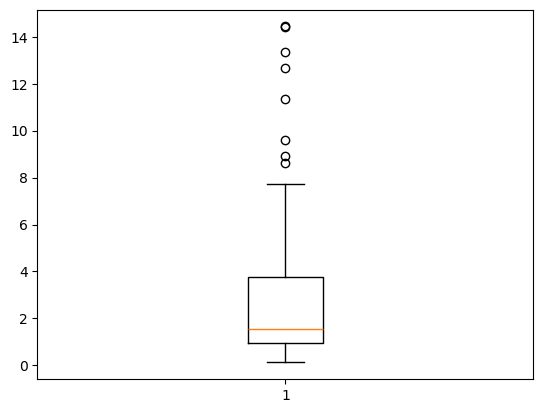

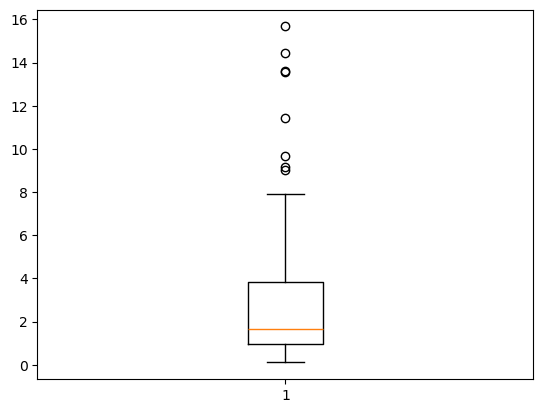

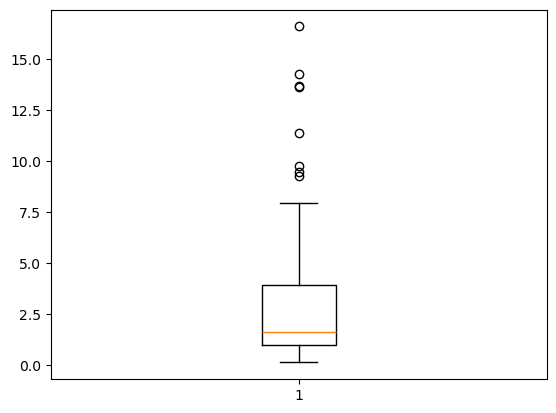

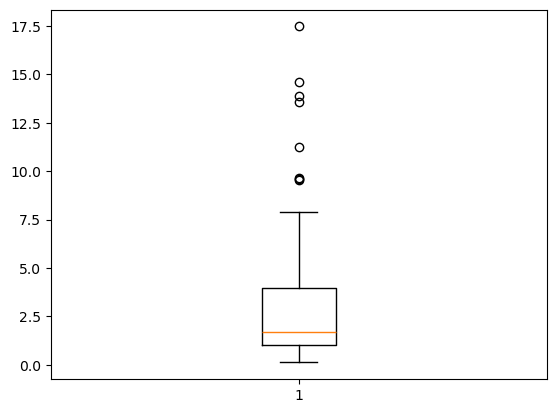

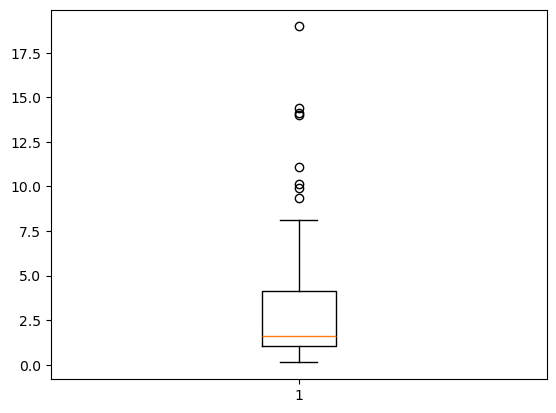

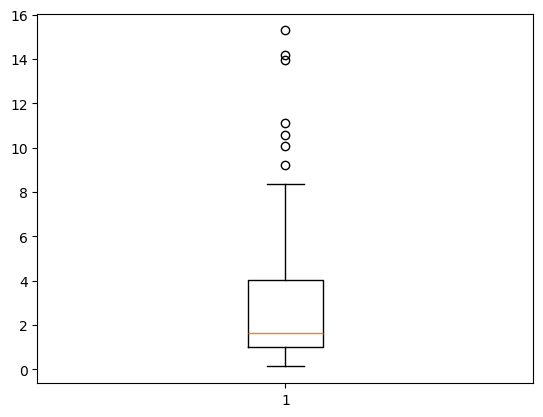

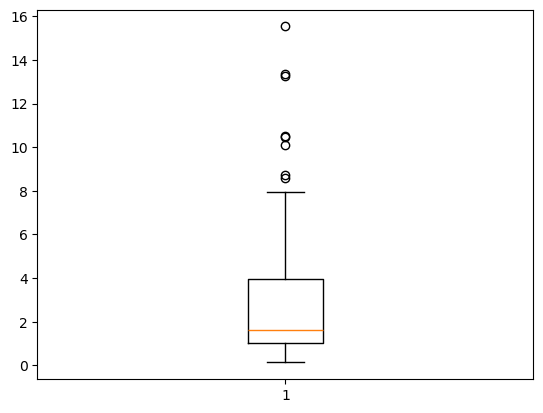

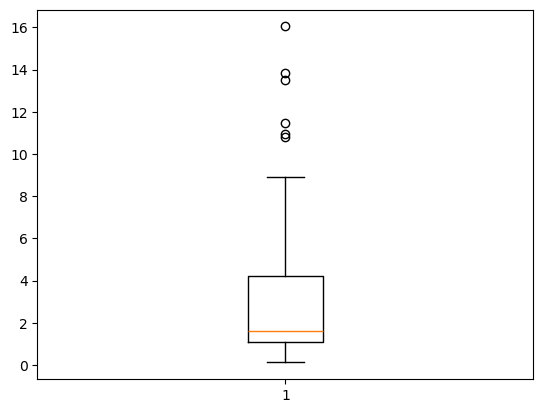

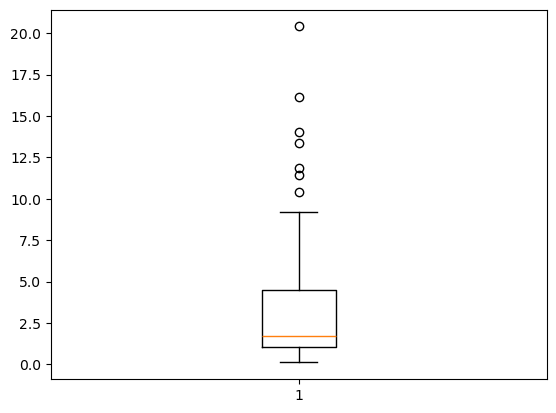

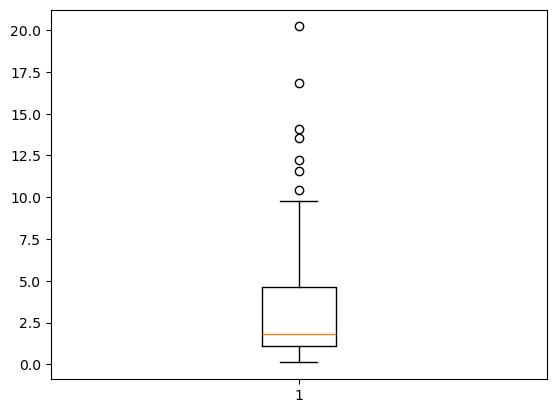

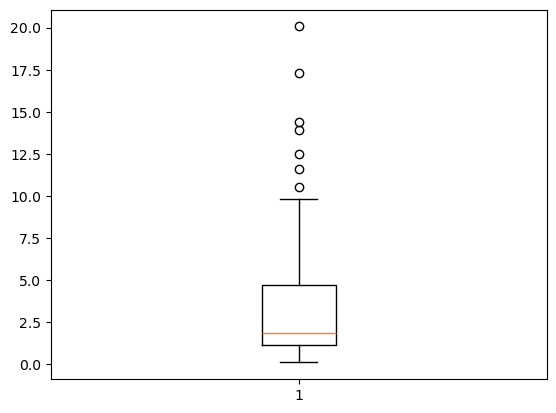

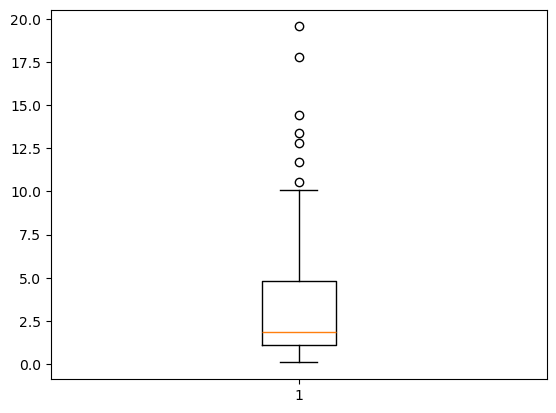

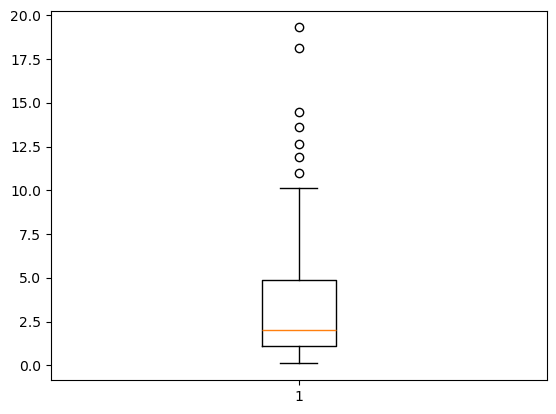

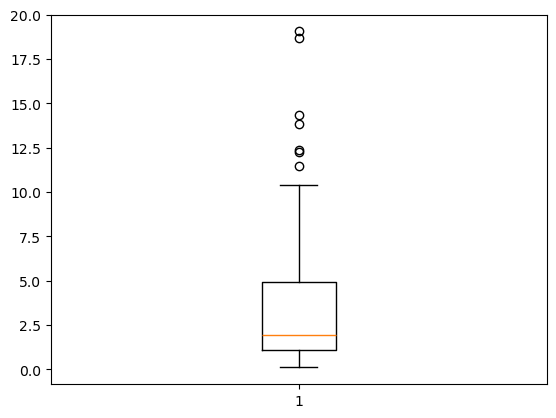

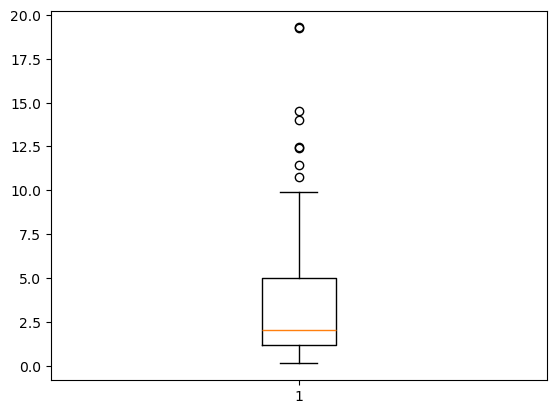

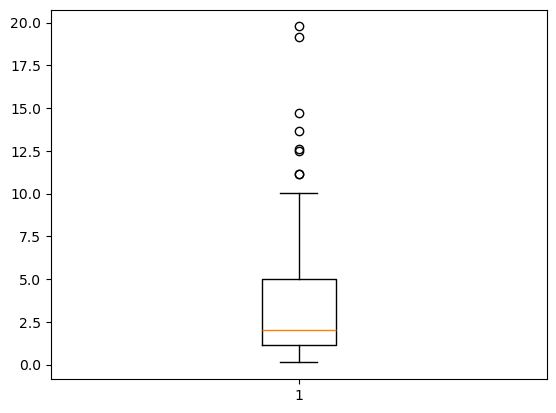

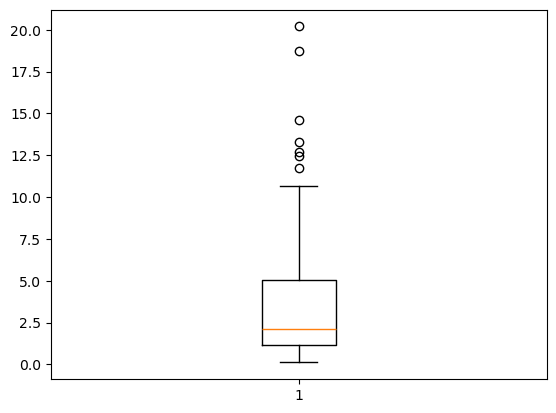

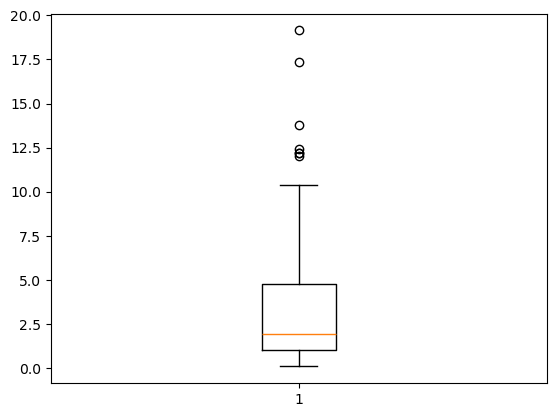

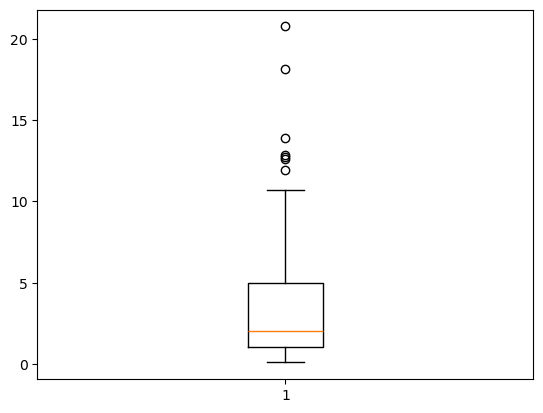

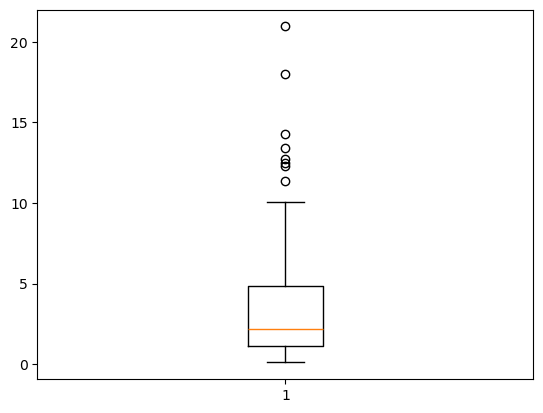

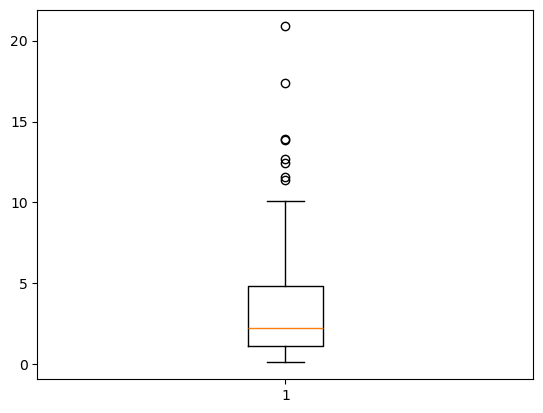

In [16]:
for name in df.columns[1:]:
    q1=df[name].quantile(0.25)
    q3=df[name].quantile(0.75)
    
    iqr=q3-q1
    
    uw=q3+1.5*iqr
    lw=q1-1.5*iqr
    
    plt.boxplot(df[name][(df[name]>lw)&(df[name]<uw)])
    plt.show()

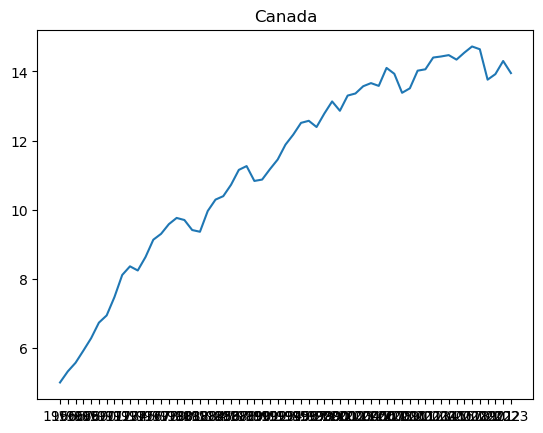

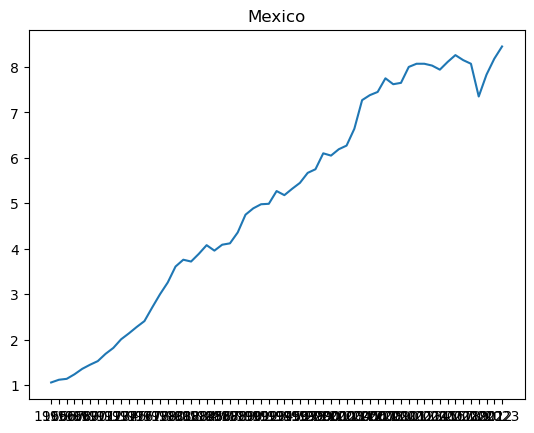

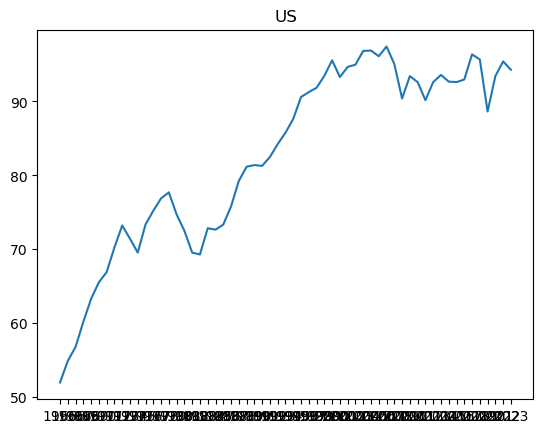

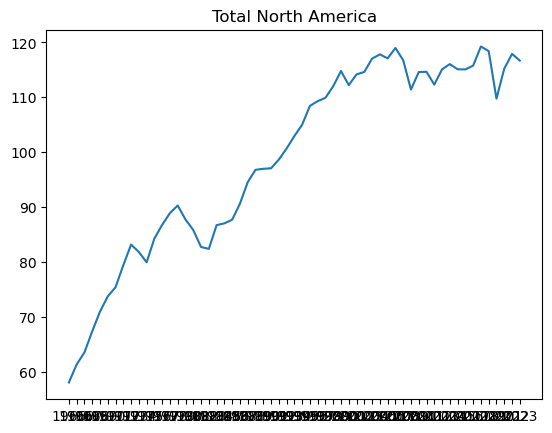

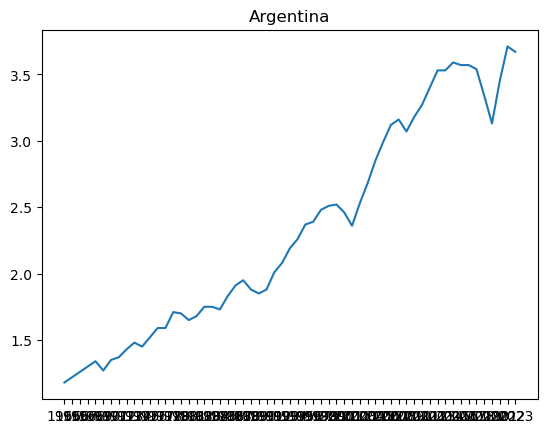

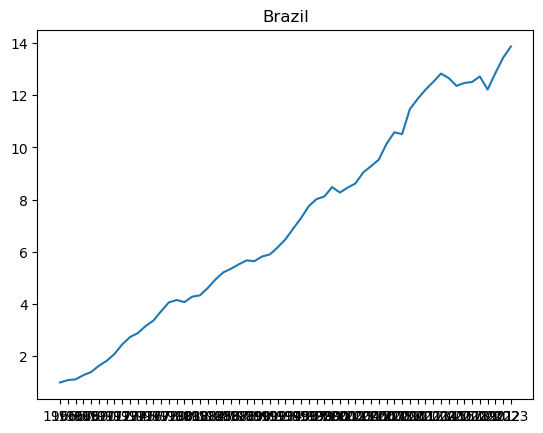

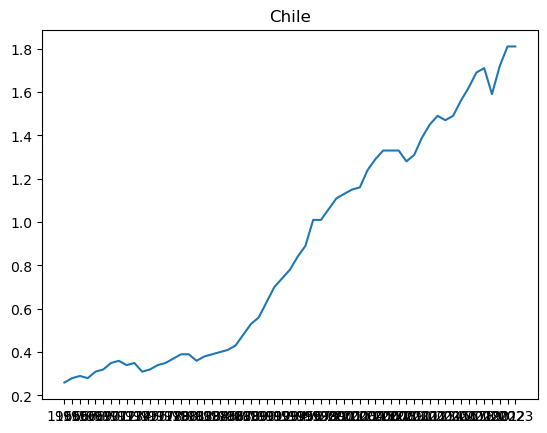

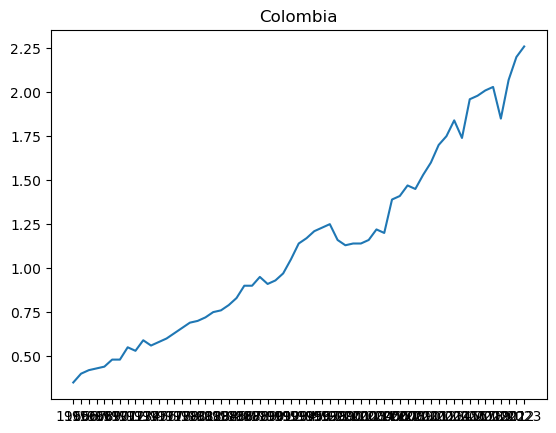

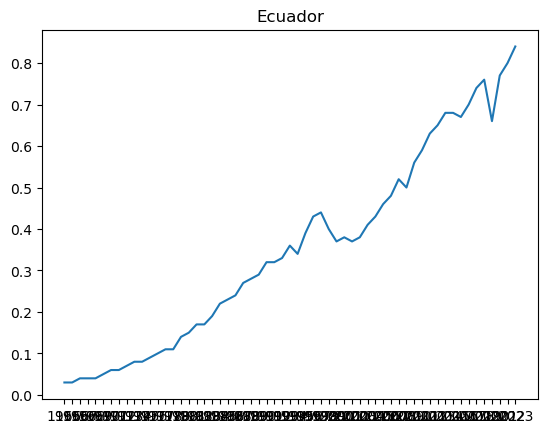

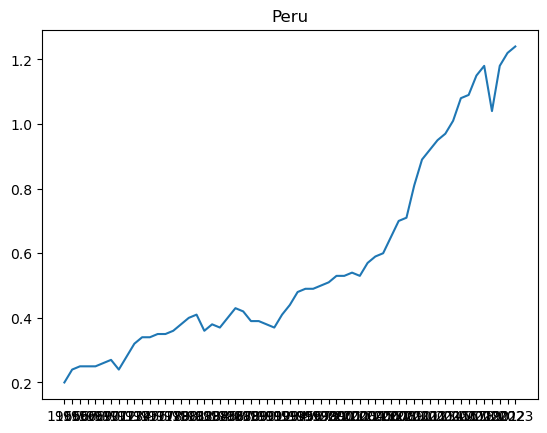

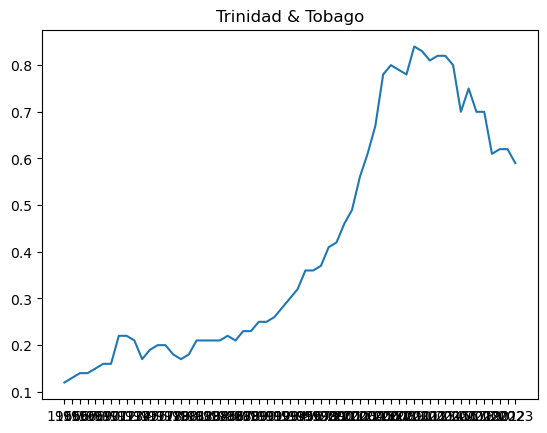

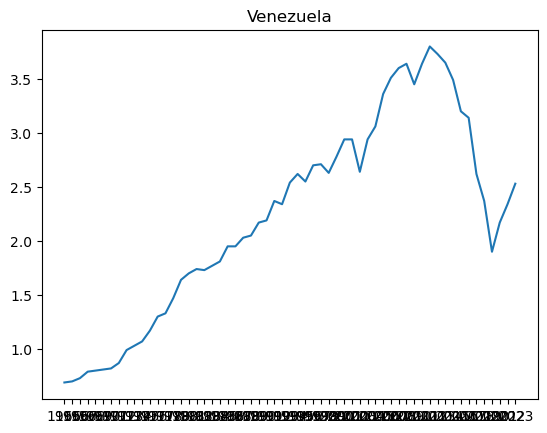

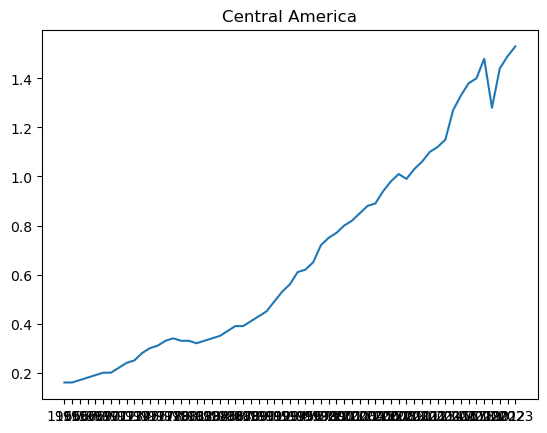

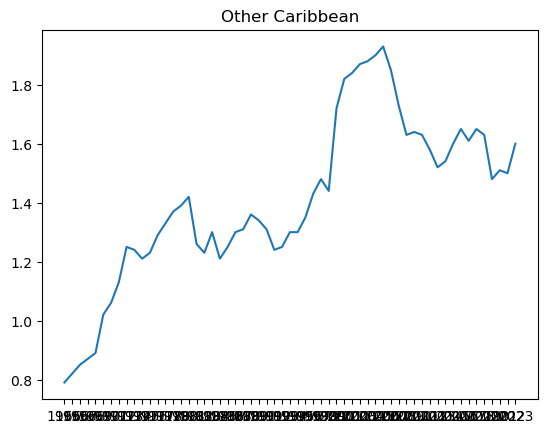

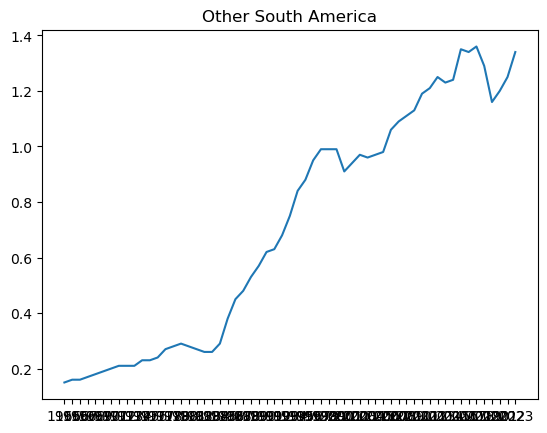

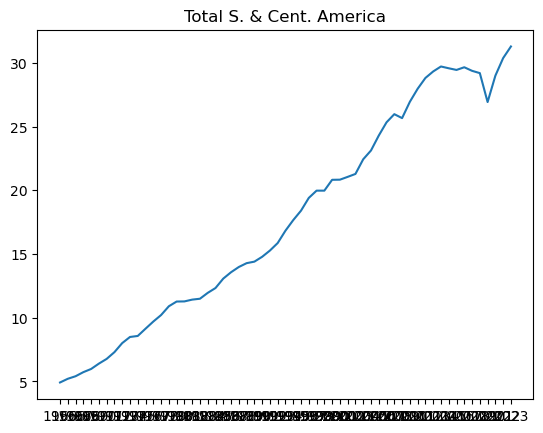

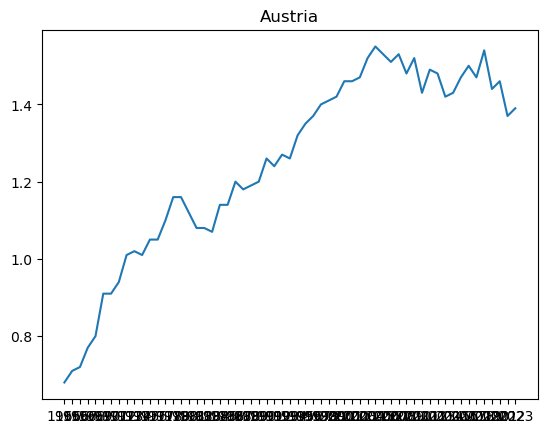

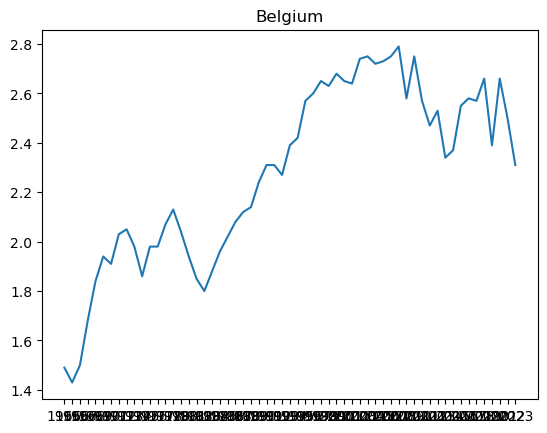

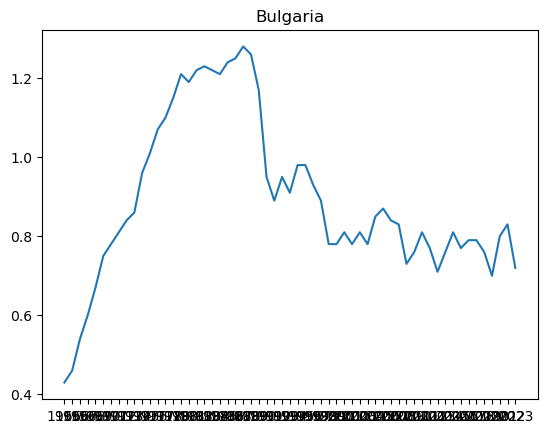

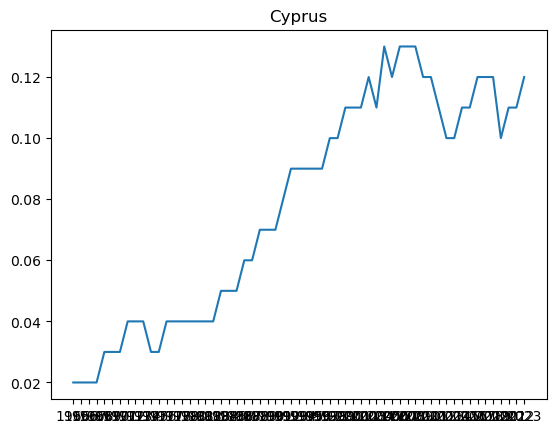

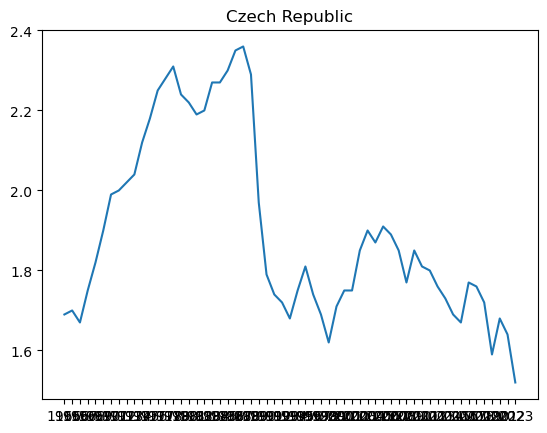

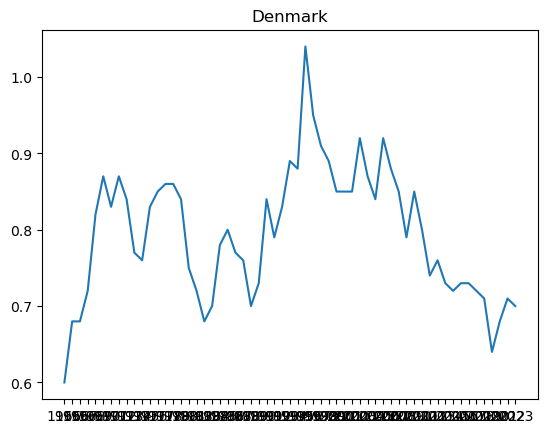

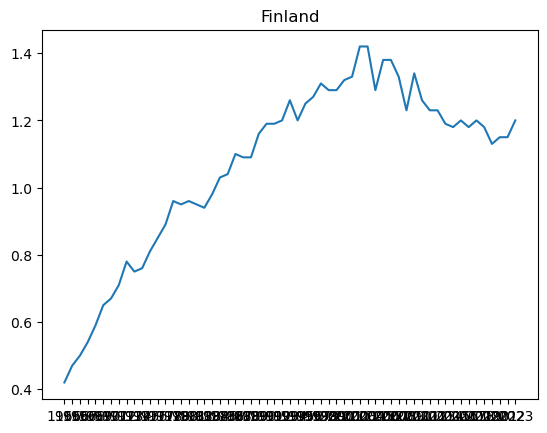

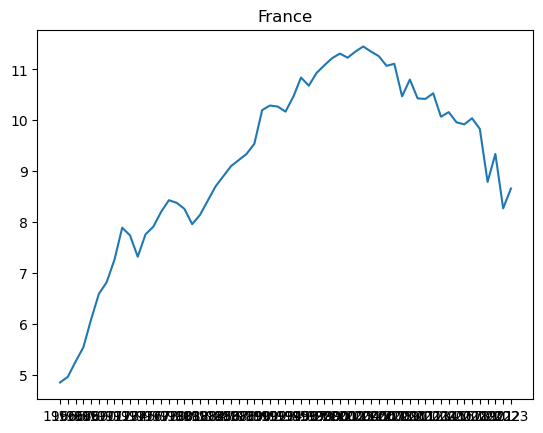

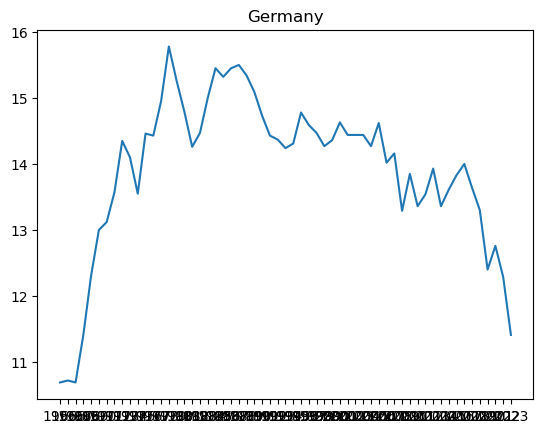

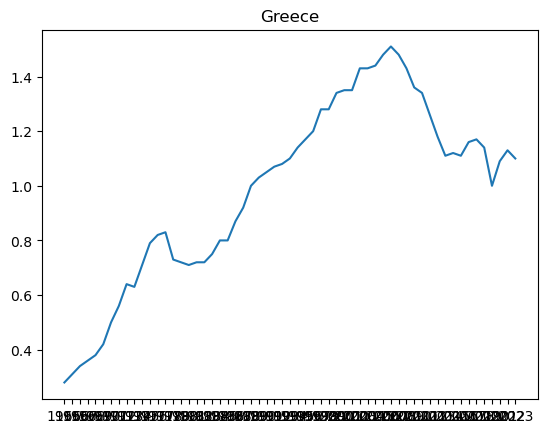

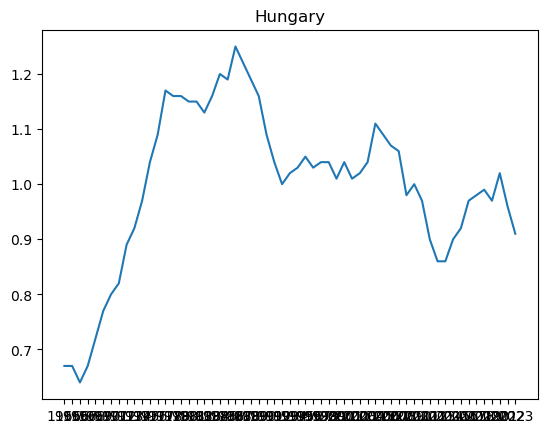

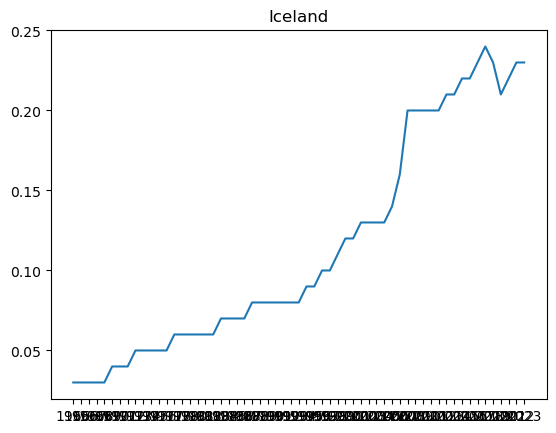

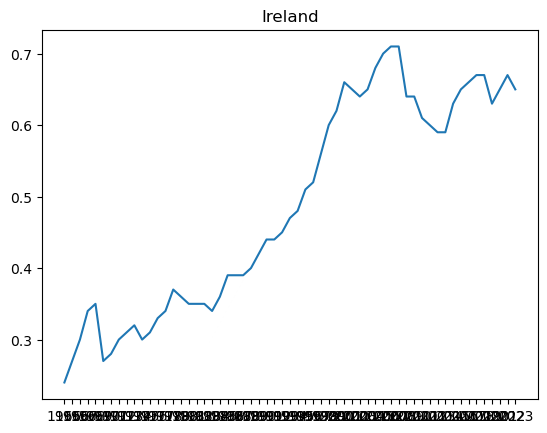

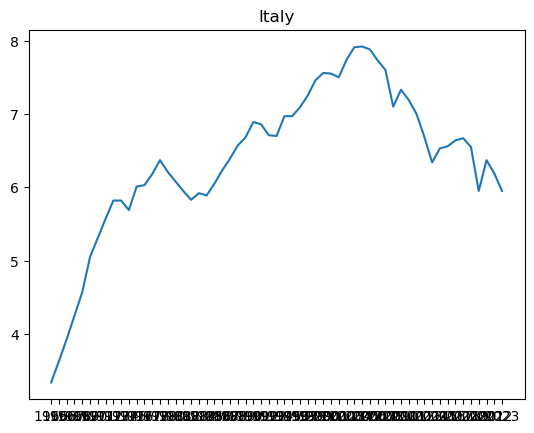

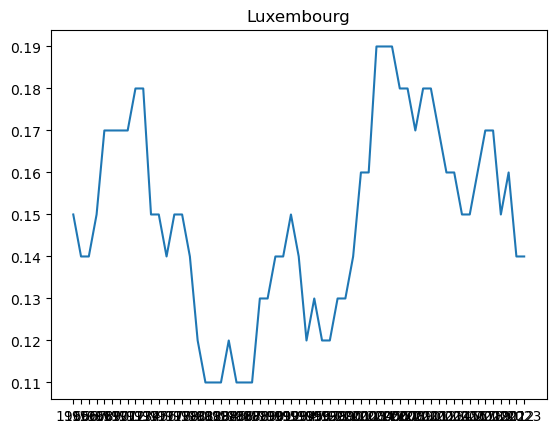

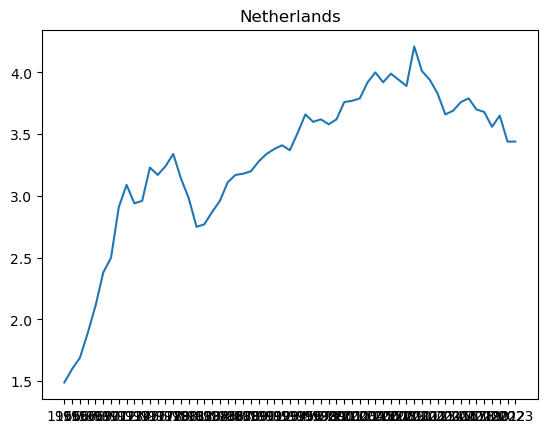

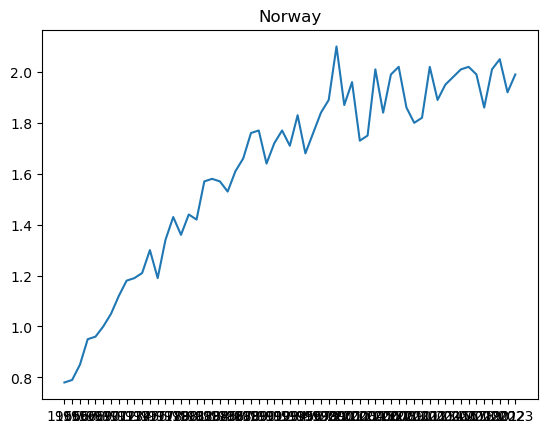

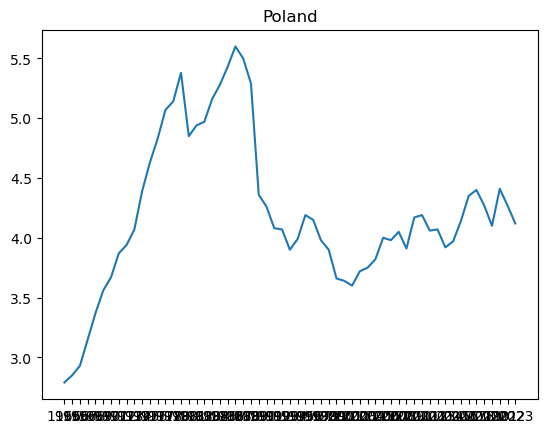

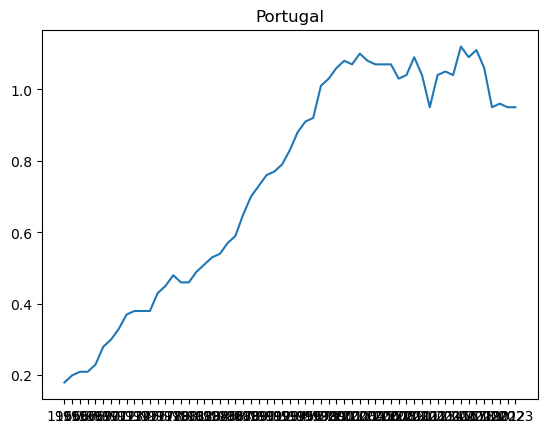

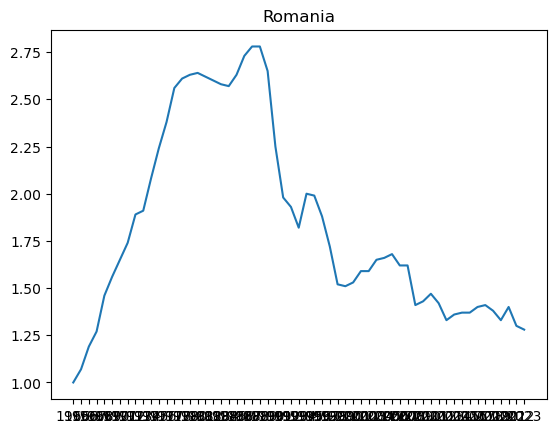

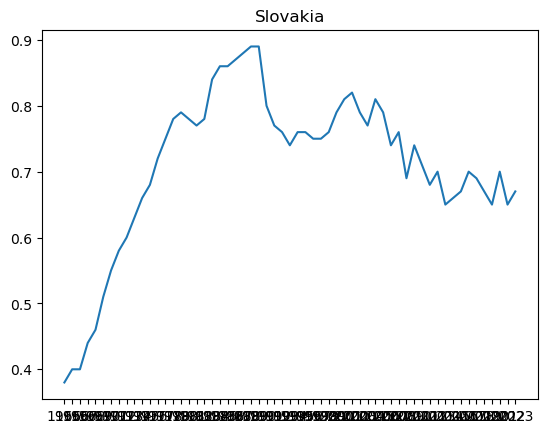

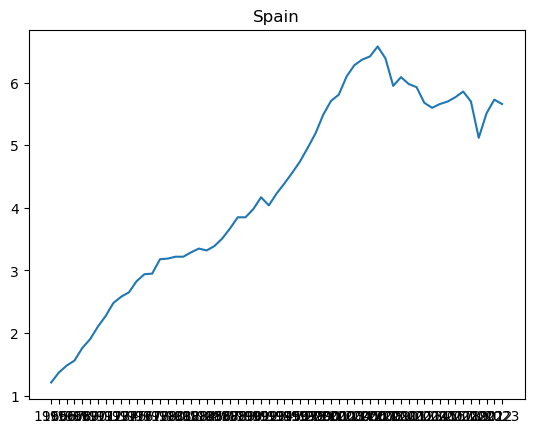

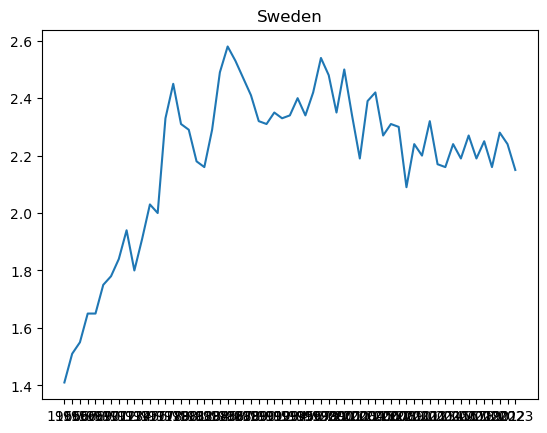

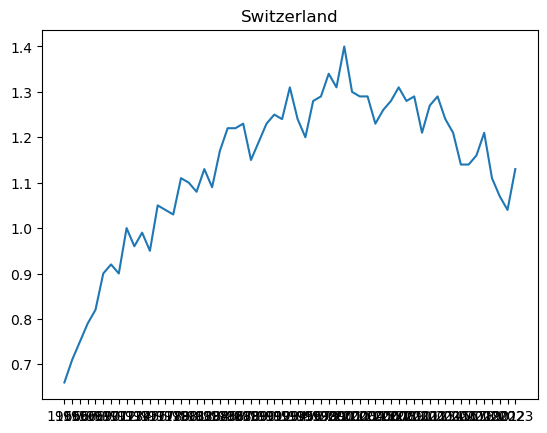

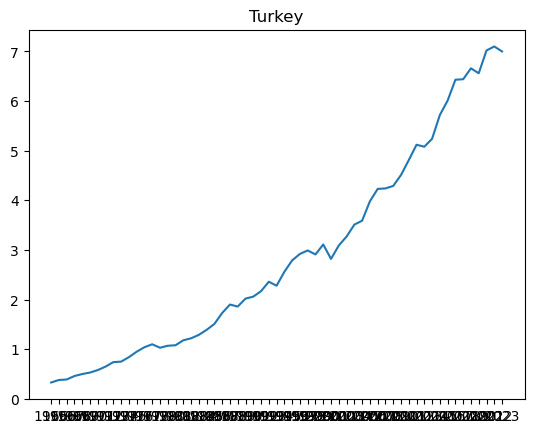

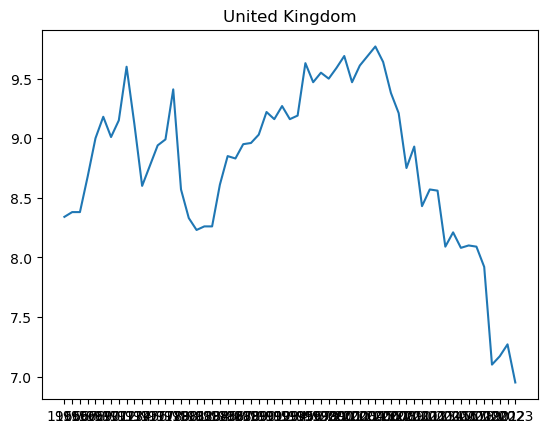

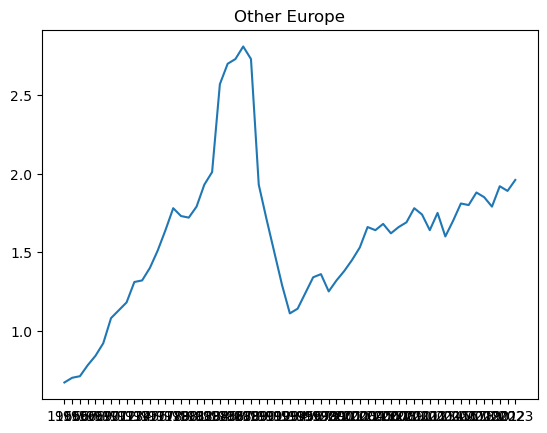

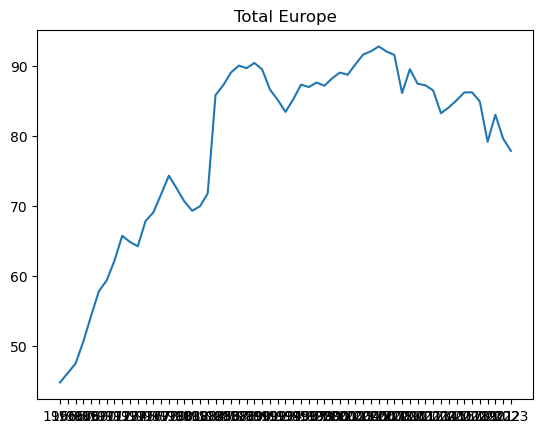

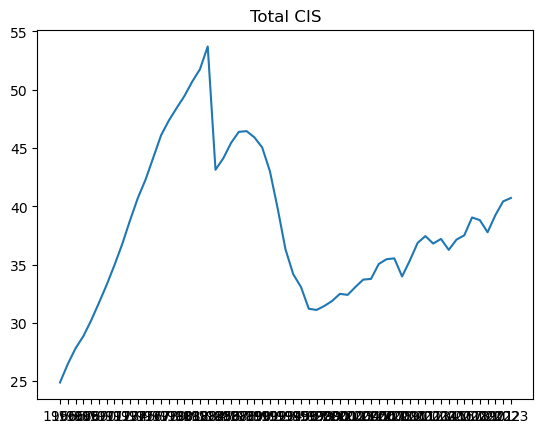

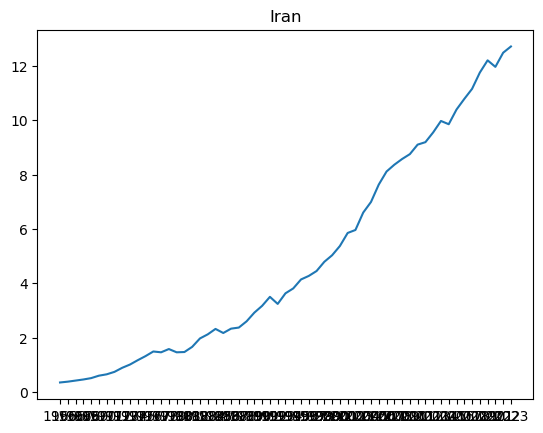

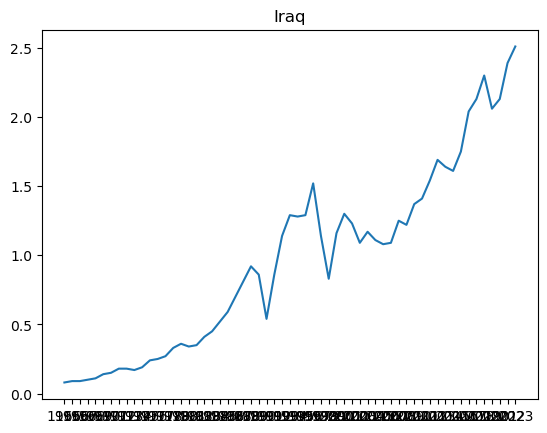

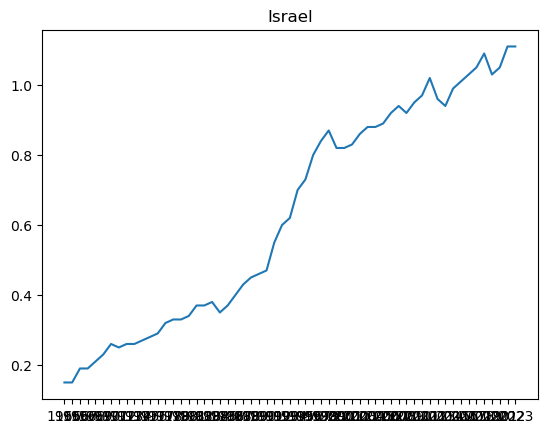

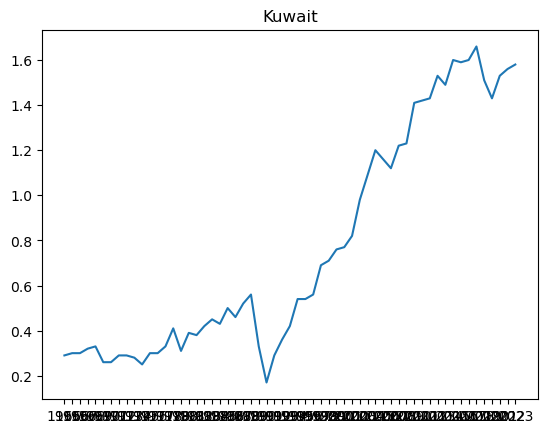

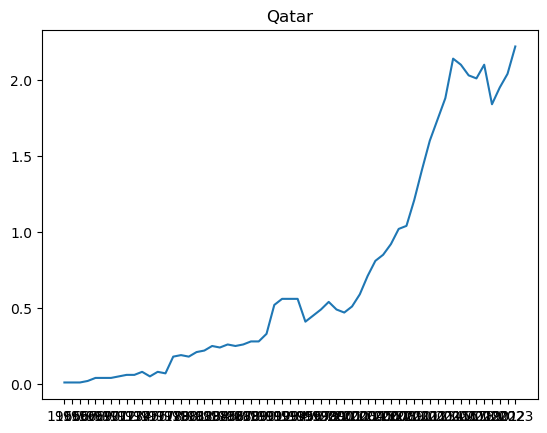

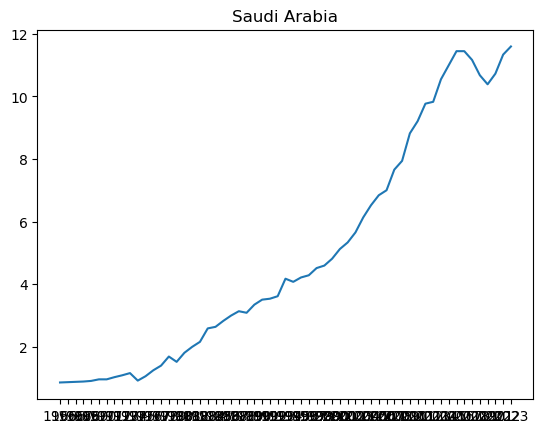

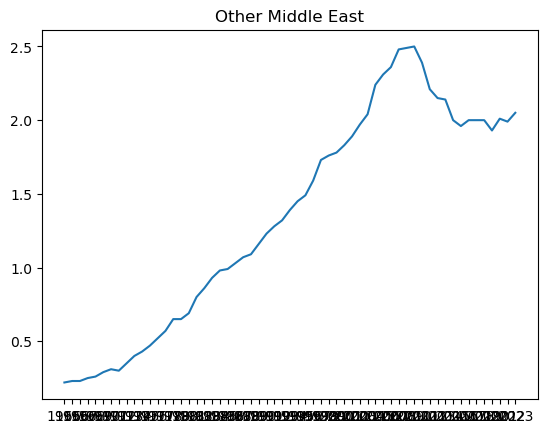

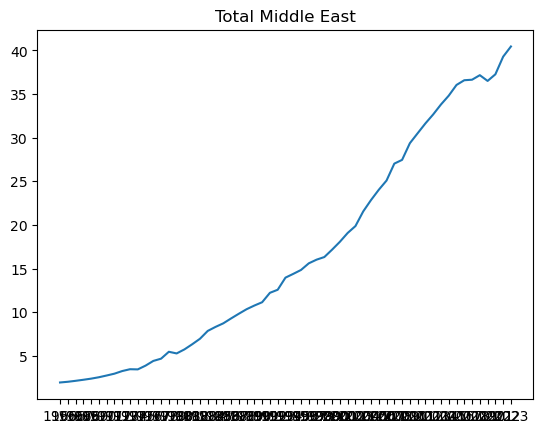

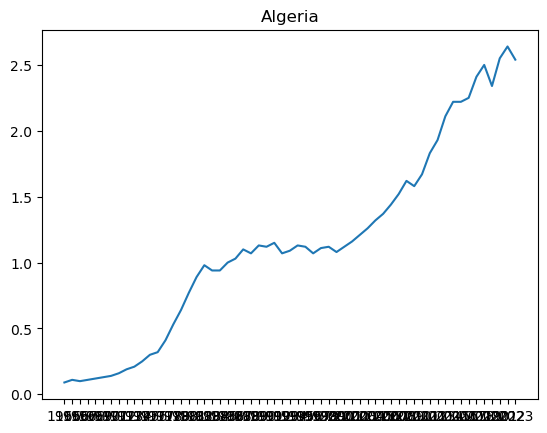

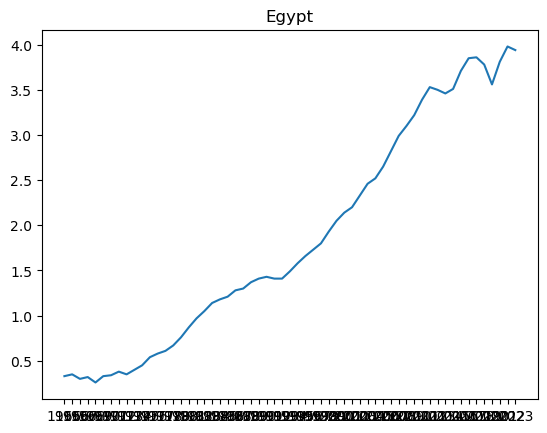

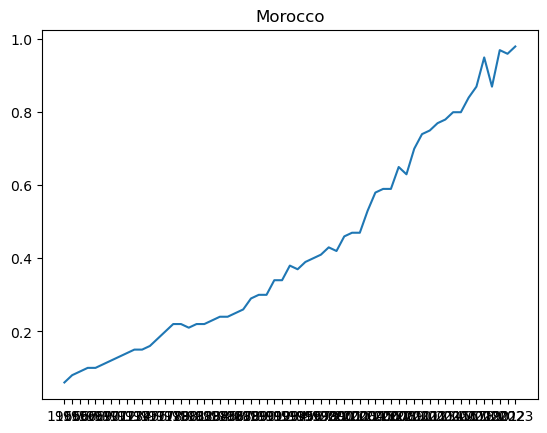

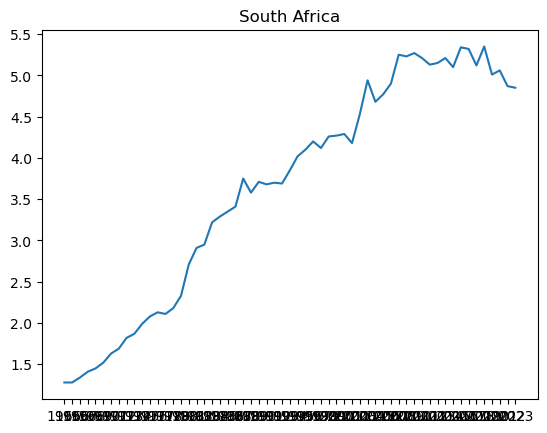

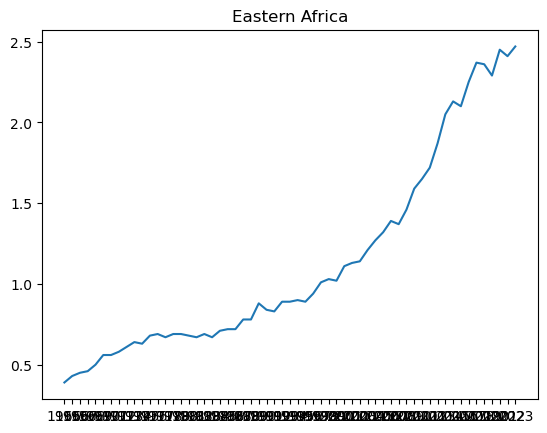

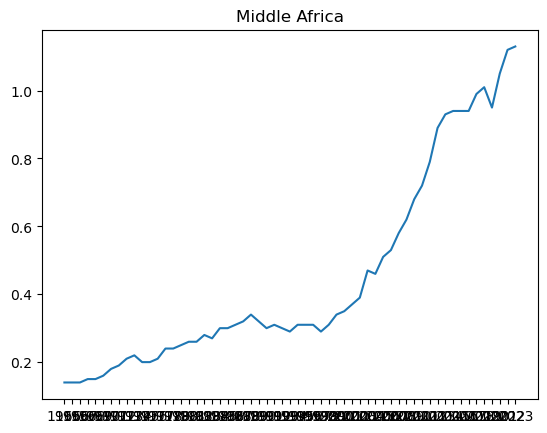

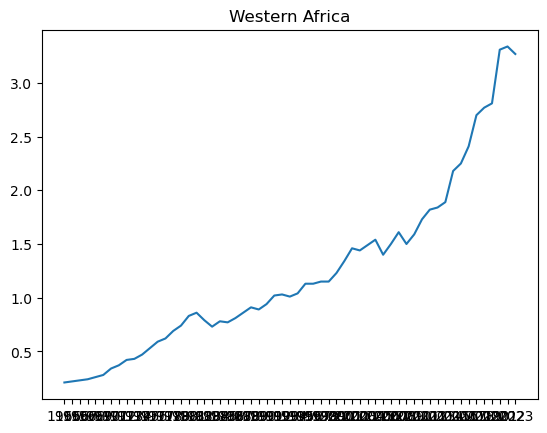

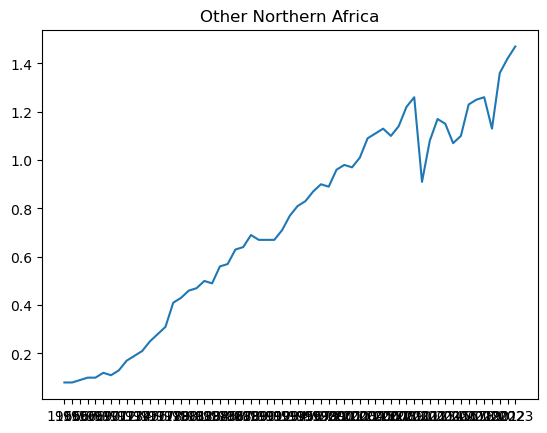

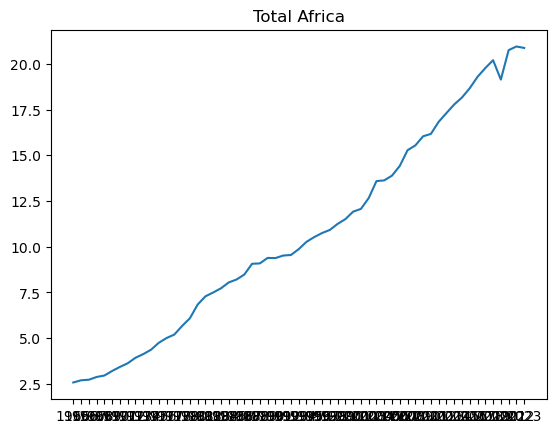

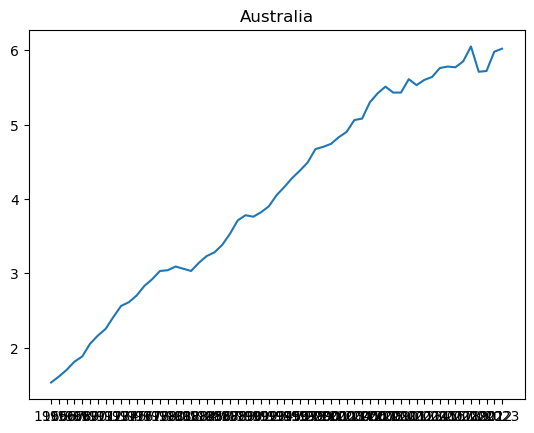

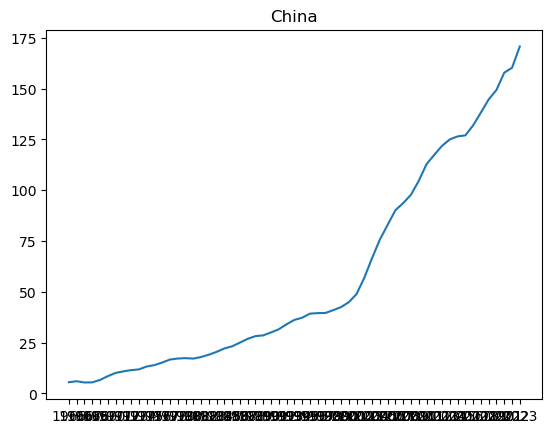

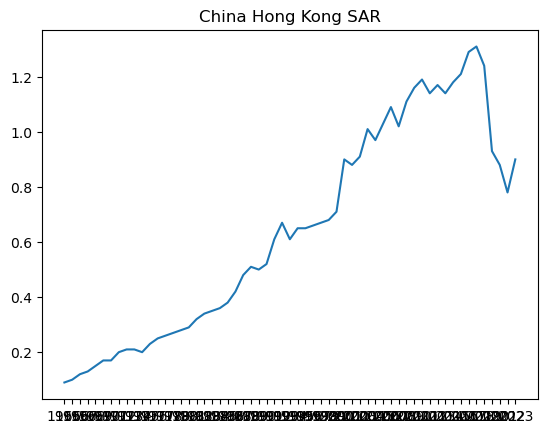

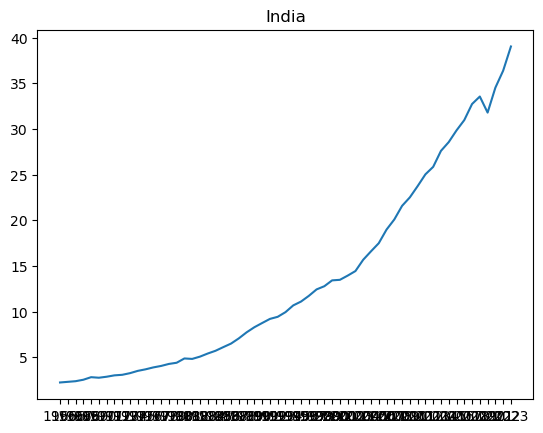

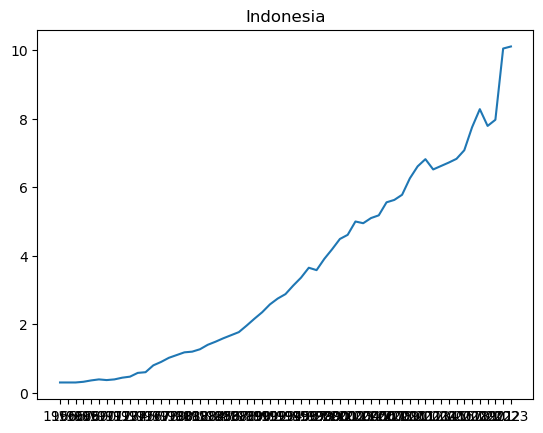

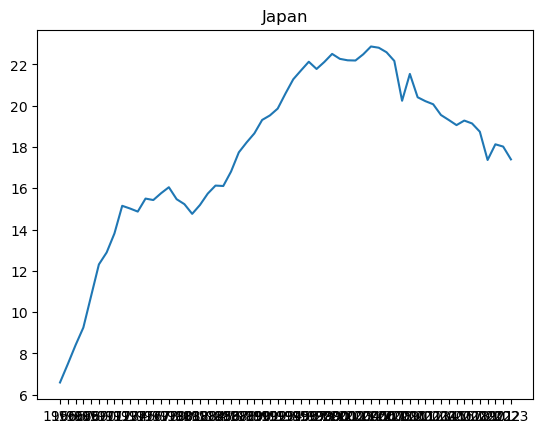

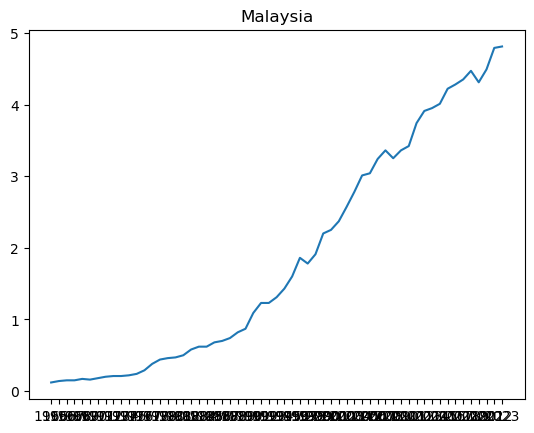

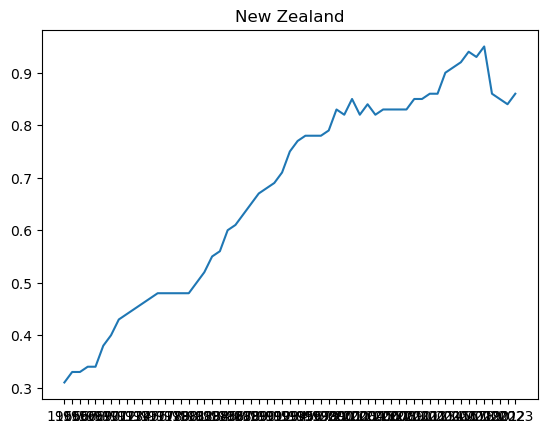

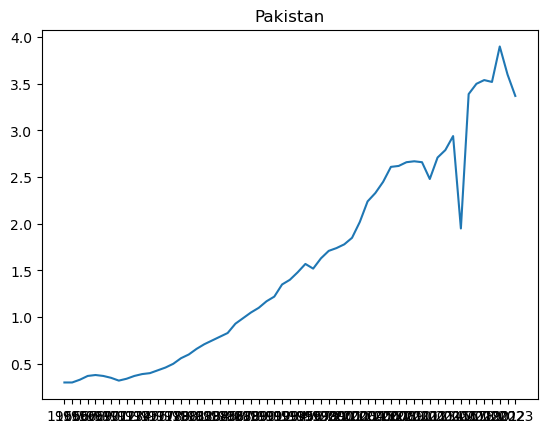

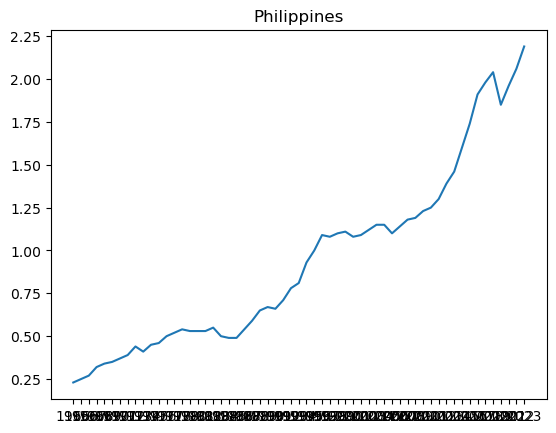

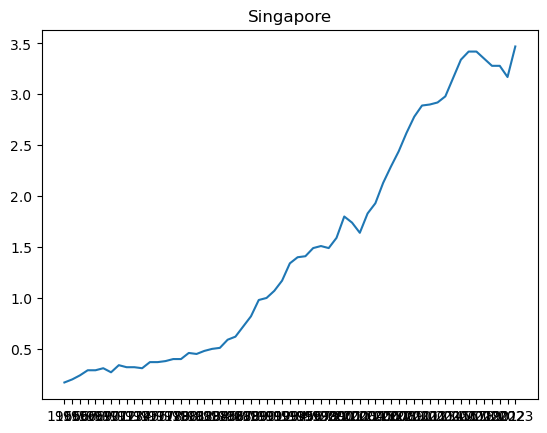

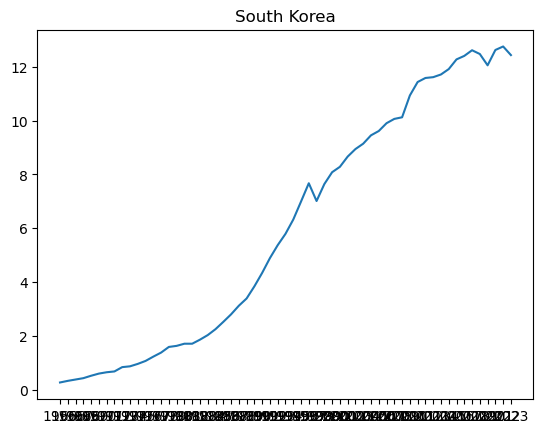

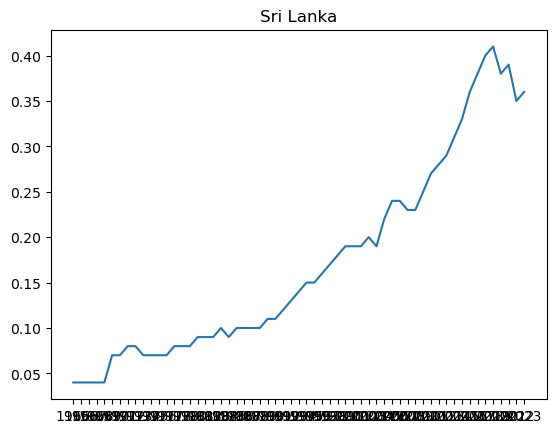

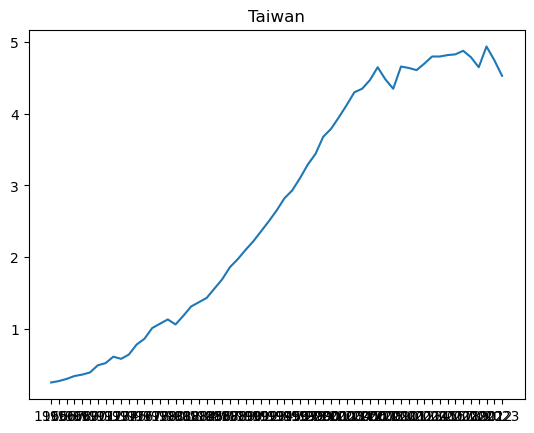

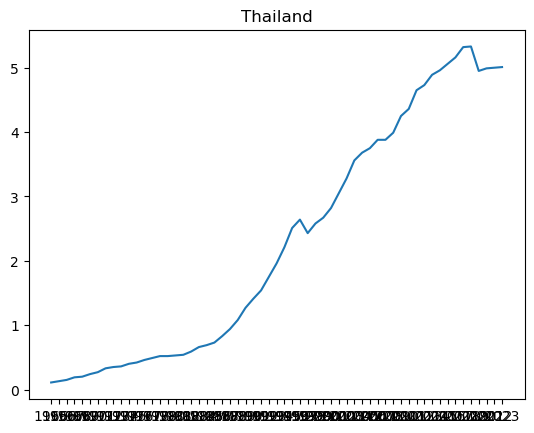

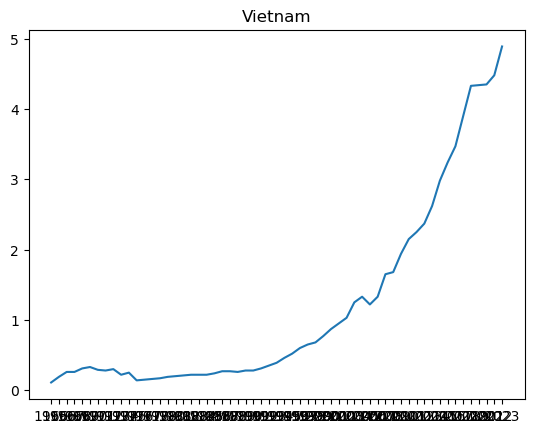

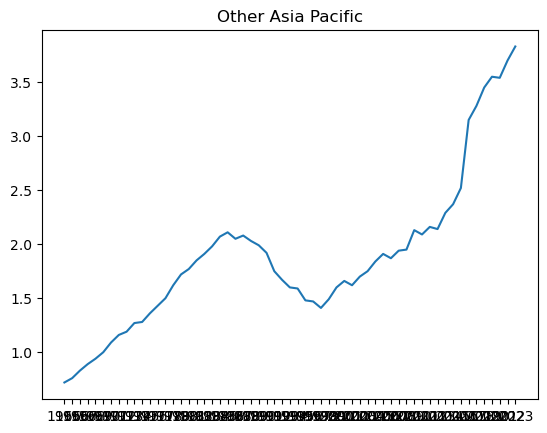

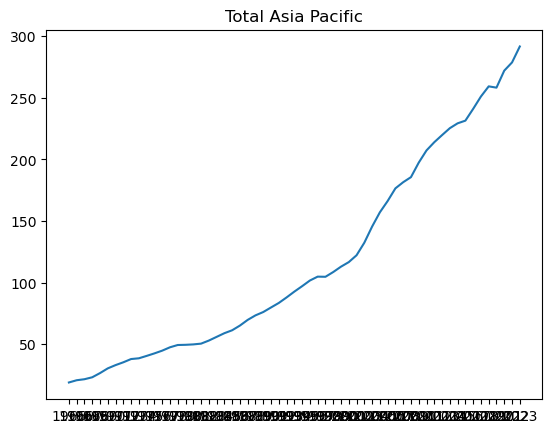

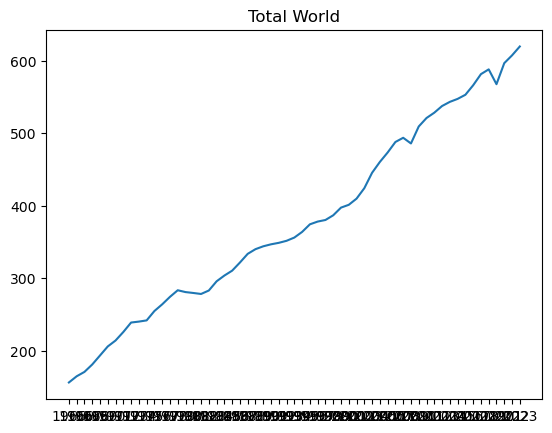

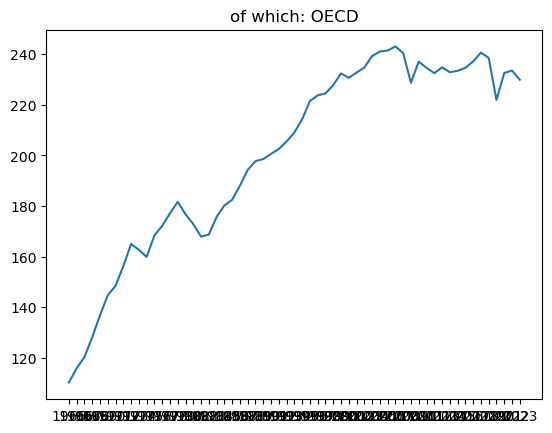

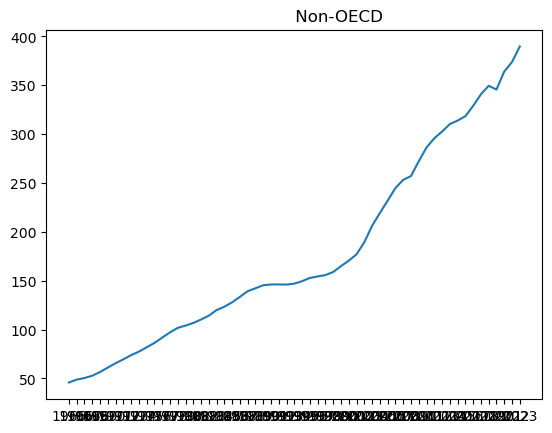

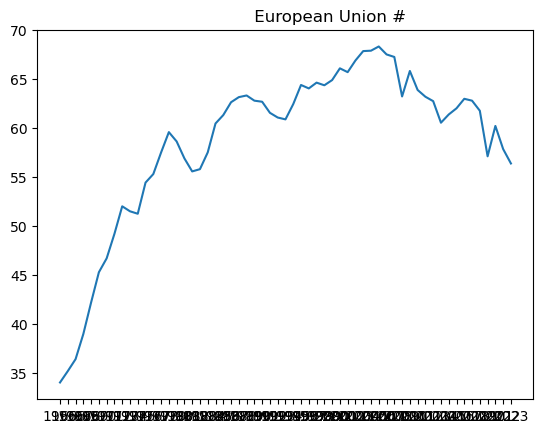

In [17]:
for i, name in enumerate(df.Country):
    plt.plot(df.iloc[i][1:])
    plt.title(name)
    plt.show()

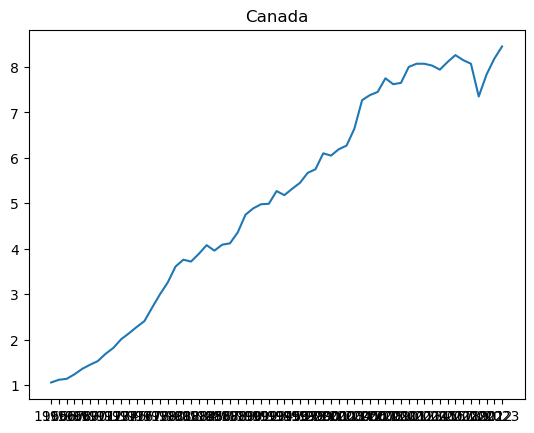

In [18]:
plt.plot(df.iloc[1][1:])
plt.title("Canada")
plt.show()

In [19]:
train=df.iloc[0][1:][:len(df.iloc[0][1:])-30].astype(float)
test=df.iloc[0][1:][len(df.iloc[0][1:])-30:].astype(float)

In [20]:
train.head()

1965    5.00
1966    5.32
1967    5.57
1968    5.92
1969    6.28
Name: 1, dtype: float64

In [21]:
model=sm.tsa.ARIMA(train, order=(1, 3, 50)).fit()

C:\Users\abhij\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\abhij\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\abhij\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\abhij\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\abhij\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: C

In [36]:
pred=model.predict(start=len(train),end=len(df.iloc[0][1:])-1)

In [43]:
pred.index=test.index

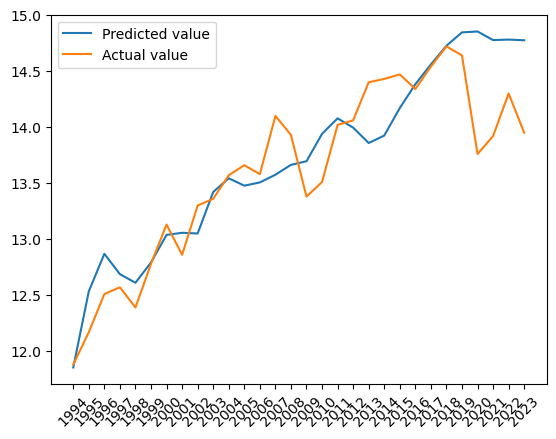

In [47]:
plt.plot(pred,label='Predicted value')
plt.plot(test,label='Actual value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [25]:
print(f"Mean absolute percent error : {np.mean(np.abs((test-pred)/test))*100}")

Mean absolute percent error : 2.072762546334256
